In [1]:
#pip install pandas_profiling

Note: you may need to restart the kernel to use updated packages.


In [2]:
%run supportvectors-common.ipynb



<center><img src="https://d4x5p7s4.rocketcdn.me/wp-content/uploads/2016/03/logo-poster-smaller.png"/> </center>
<div style="color:#aaa;font-size:8pt">
<hr/>
&copy; SupportVectors. All rights reserved. <blockquote>This notebook is the intellectual property of SupportVectors, and part of its training material. 
Only the participants in SupportVectors workshops are allowed to study the notebooks for educational purposes currently, but is prohibited from copying or using it for any other purposes without written permission.

<b> These notebooks are chapters and sections from Asif Qamar's textbook that he is writing on Data Science. So we request you to not circulate the material to others.</b>
 </blockquote>
 <hr/>
</div>



In [3]:
source = '/Users/albertpinto/documents/ml/datavisualization/data/StudentsPerformance.csv'
data = pd.read_csv(source)
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
data['total score'] = data['math score'] + data['reading score'] + data['writing score']
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


### Histogram

Histogram plot the frequency distribution of a dataset. For this purpose, the entire range of values is divided into a finite number of bins. Each bin represents a sub-range of values of the dataset.This process is called **binning**. Associated with each bin is a frequency counter.

 The bins may or may not be of equal size, though equal size bins are rather common.  However, there are many strategies for binning, or the determination of the number of bins, as well as the range of values for each bins. Some of these strategies lead to bins of unequal ranges. To see the binning strategies supported by `matplotlib`, see the documentation at https://numpy.org/doc/stable/reference/generated/numpy.histogram_bin_edges.html#numpy.histogram_bin_edges.

Next, a table is made where we take each datum in the dataset, and see which of the bins *contains* it -- i.e. the bin whose range of values encompasses the specific datum value. For this corresponding bin, we increment the counter. Thus, we end up with a table where there is a frequency count associated with each of the bins.

A **frequncy histogram** is a plot of these bins along the $x$-axis, and their corresponding frequencies along the $y$-axis.

There is another variant of the histogram, where the $y$-values have been normalized by dividing it by the size or cardinality of the dataset. Then the $y$ axis represents the probability mass of each of the bins -- i.e. the probability that a datum drawm from the dataset would fall into that particular bin. This variant of the histogram is called the **density histogram**.

A third kind of histogram is the **cumulative histogram**, where the $y$-axis values are the cumulative probabilities of a datum belonging either to this bin, or to any of the bins before it.

It was Karl Pearson, the student of Galton, who first used the histogram to study the distribution of data.

#### Intuition
The histogram gives us an intuitive sense of the univariate data's distribution or spread across values. One can look at it, and mentally extrapolate on how the probability density plot would look like if we had a sufficiently large dataset with an identical distribution (e.g., derived from the same source or causative phenomenon). In such a case, we could make the bins smaller and smaller, and then in the asymptotic limit of very large population, and increasingly small bins, the density histogram would approximate the density estimator plot more and more accurately.

#### Characteristics

Two common characteristics to observe in a histogram are the presence of:

* **Skew** skew is the greater spread of the data in one direction of values, as opposed to another. If the data has a more spread out distribution on the right side than the left (with respect to the peak), we say it has a positive skew. The contrary of this is negative skew. If the data has a symmetric distribution (as in a bell-curve, for example), then we say that it does not have a skew.

    One intuitive and easy way to remember the direction of skew is to imagine the histogram as the head of a bird. Is the bird looking right and so is its beak going right? Then the data has a positive skew. Likewise if the bird is looking left, then it has a negative skew. If the bird is looking straight at you, the data is symmetric and has no skew!
    
    
* **Modality** This is the number of peaks the histogram has. If there is a single peak, then it is a unimodal distribution. If it has two, it is bimodal. And so forth.

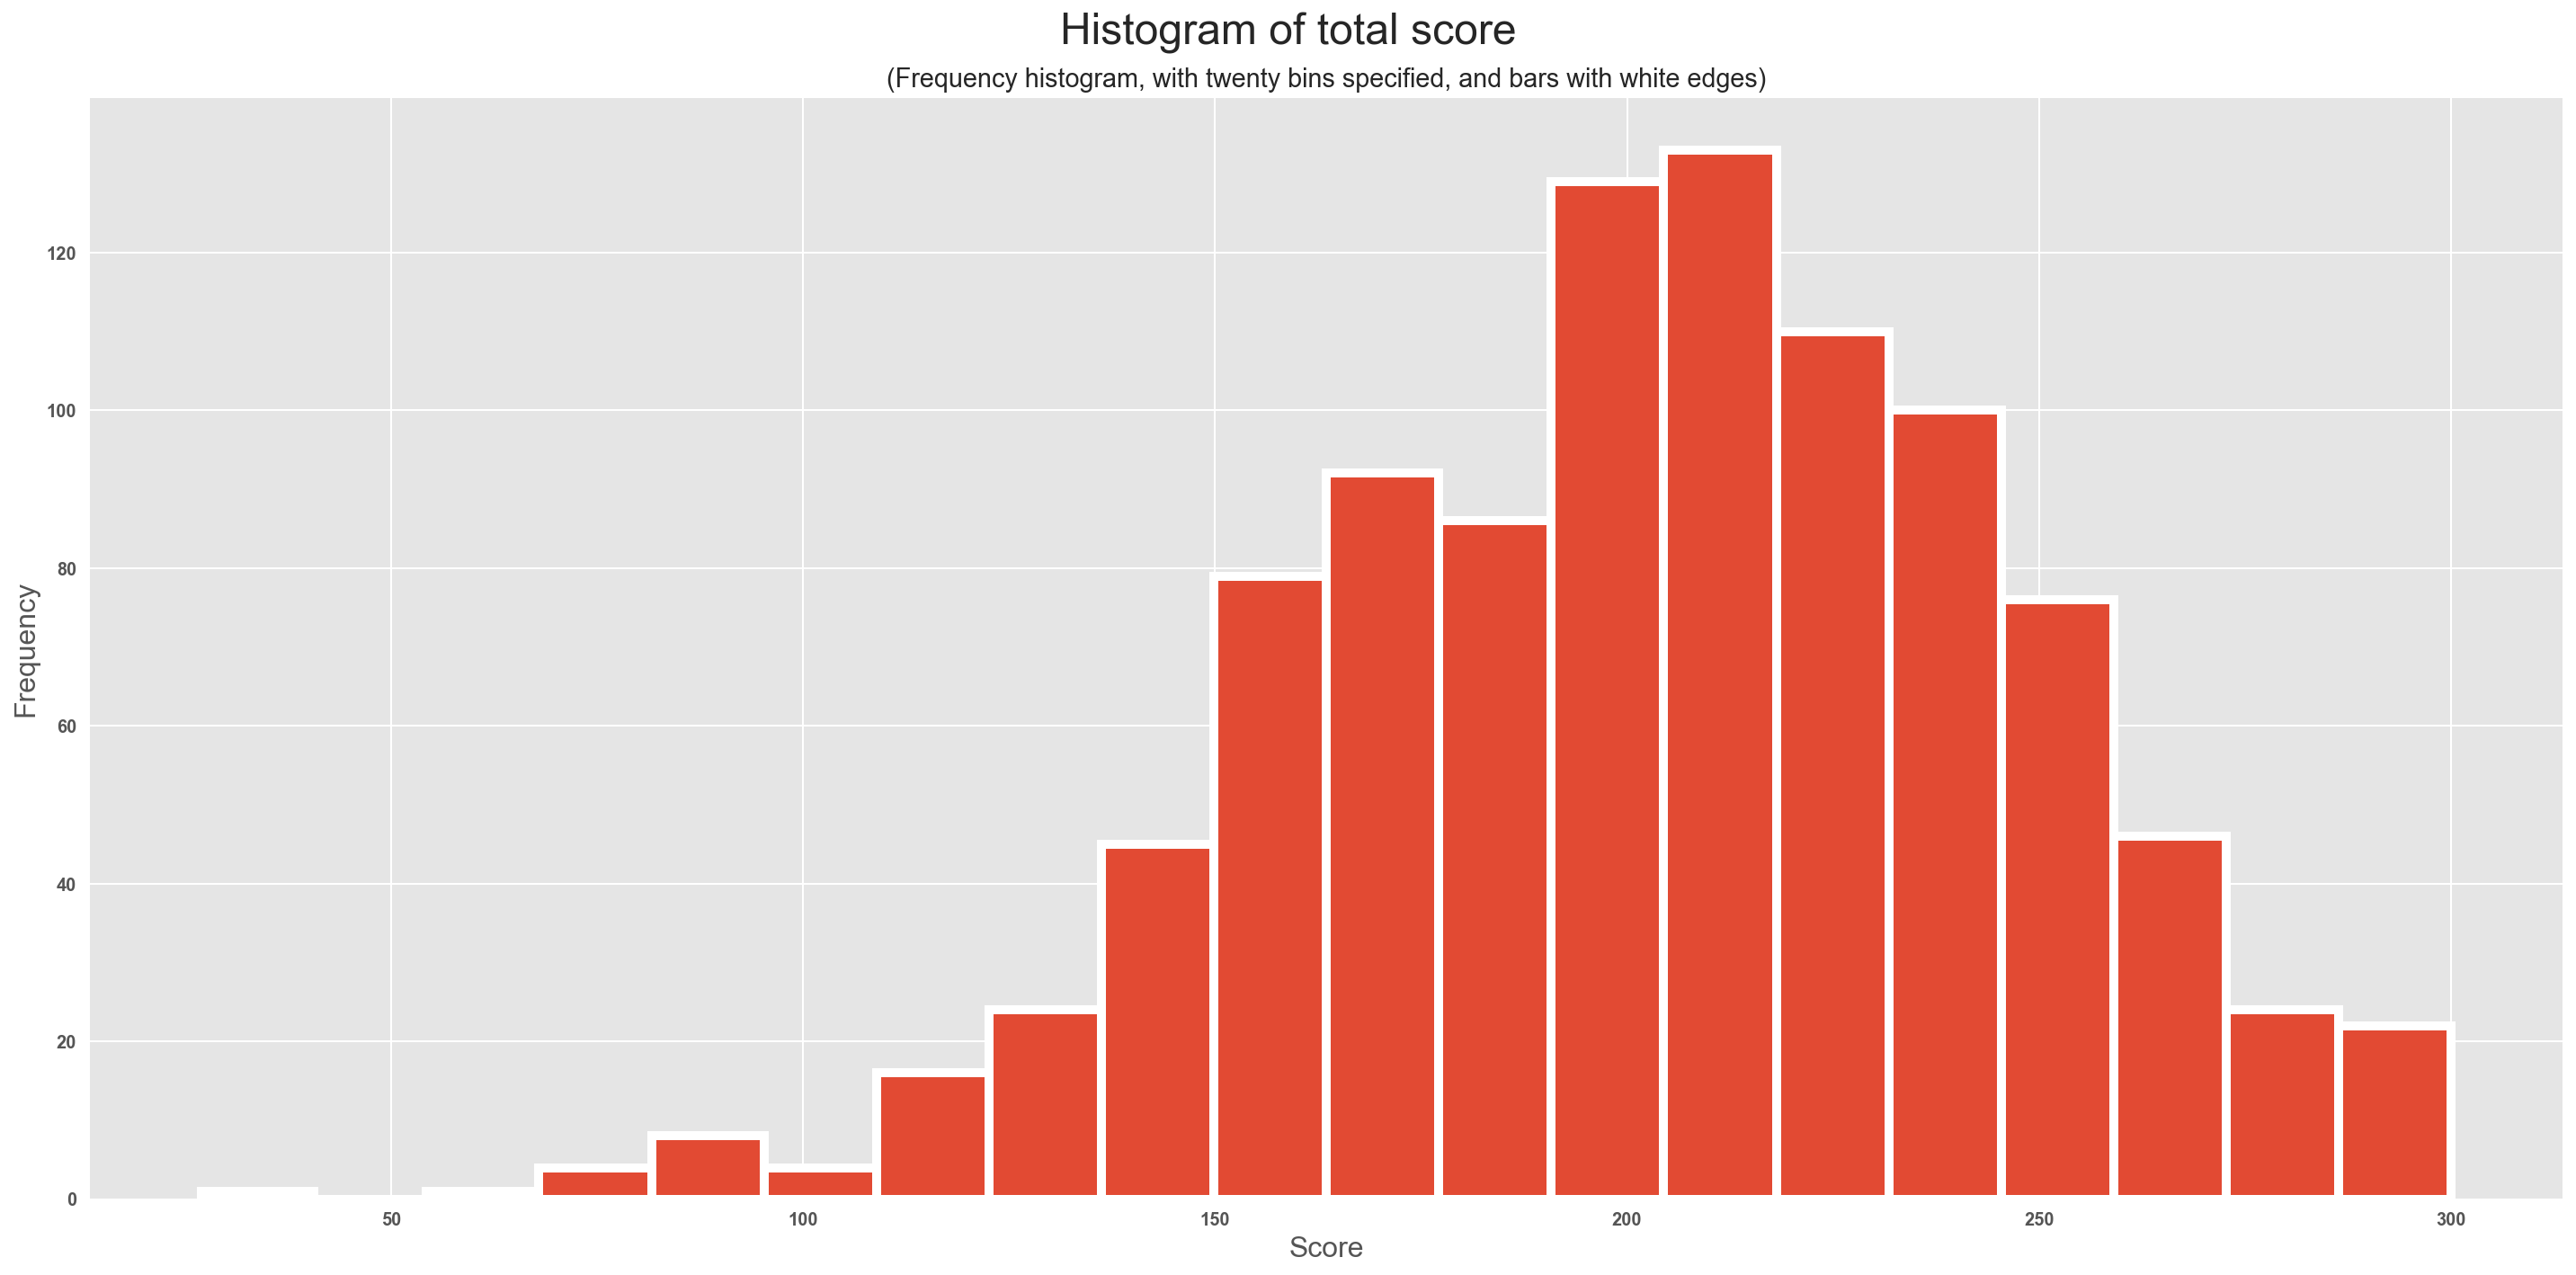

In [5]:

plt.suptitle ('Histogram of total score' ,fontsize =24)
plt.title('(Frequency histogram, with twenty bins specified, and bars with white edges)')
plt.xlabel('Score', fontsize =16)
plt.ylabel('Frequency', fontsize =16)
plt.hist(data['total score'], bins=20, edgecolor ='white',lw=5) # histogram with 20 bins specified
plt.tight_layout()


### Density histogram

In order to make it a density histogram, we merely need to add the argument `density=True`. Recall that, by looking at relative frequencies, we are looking at the probability density function.

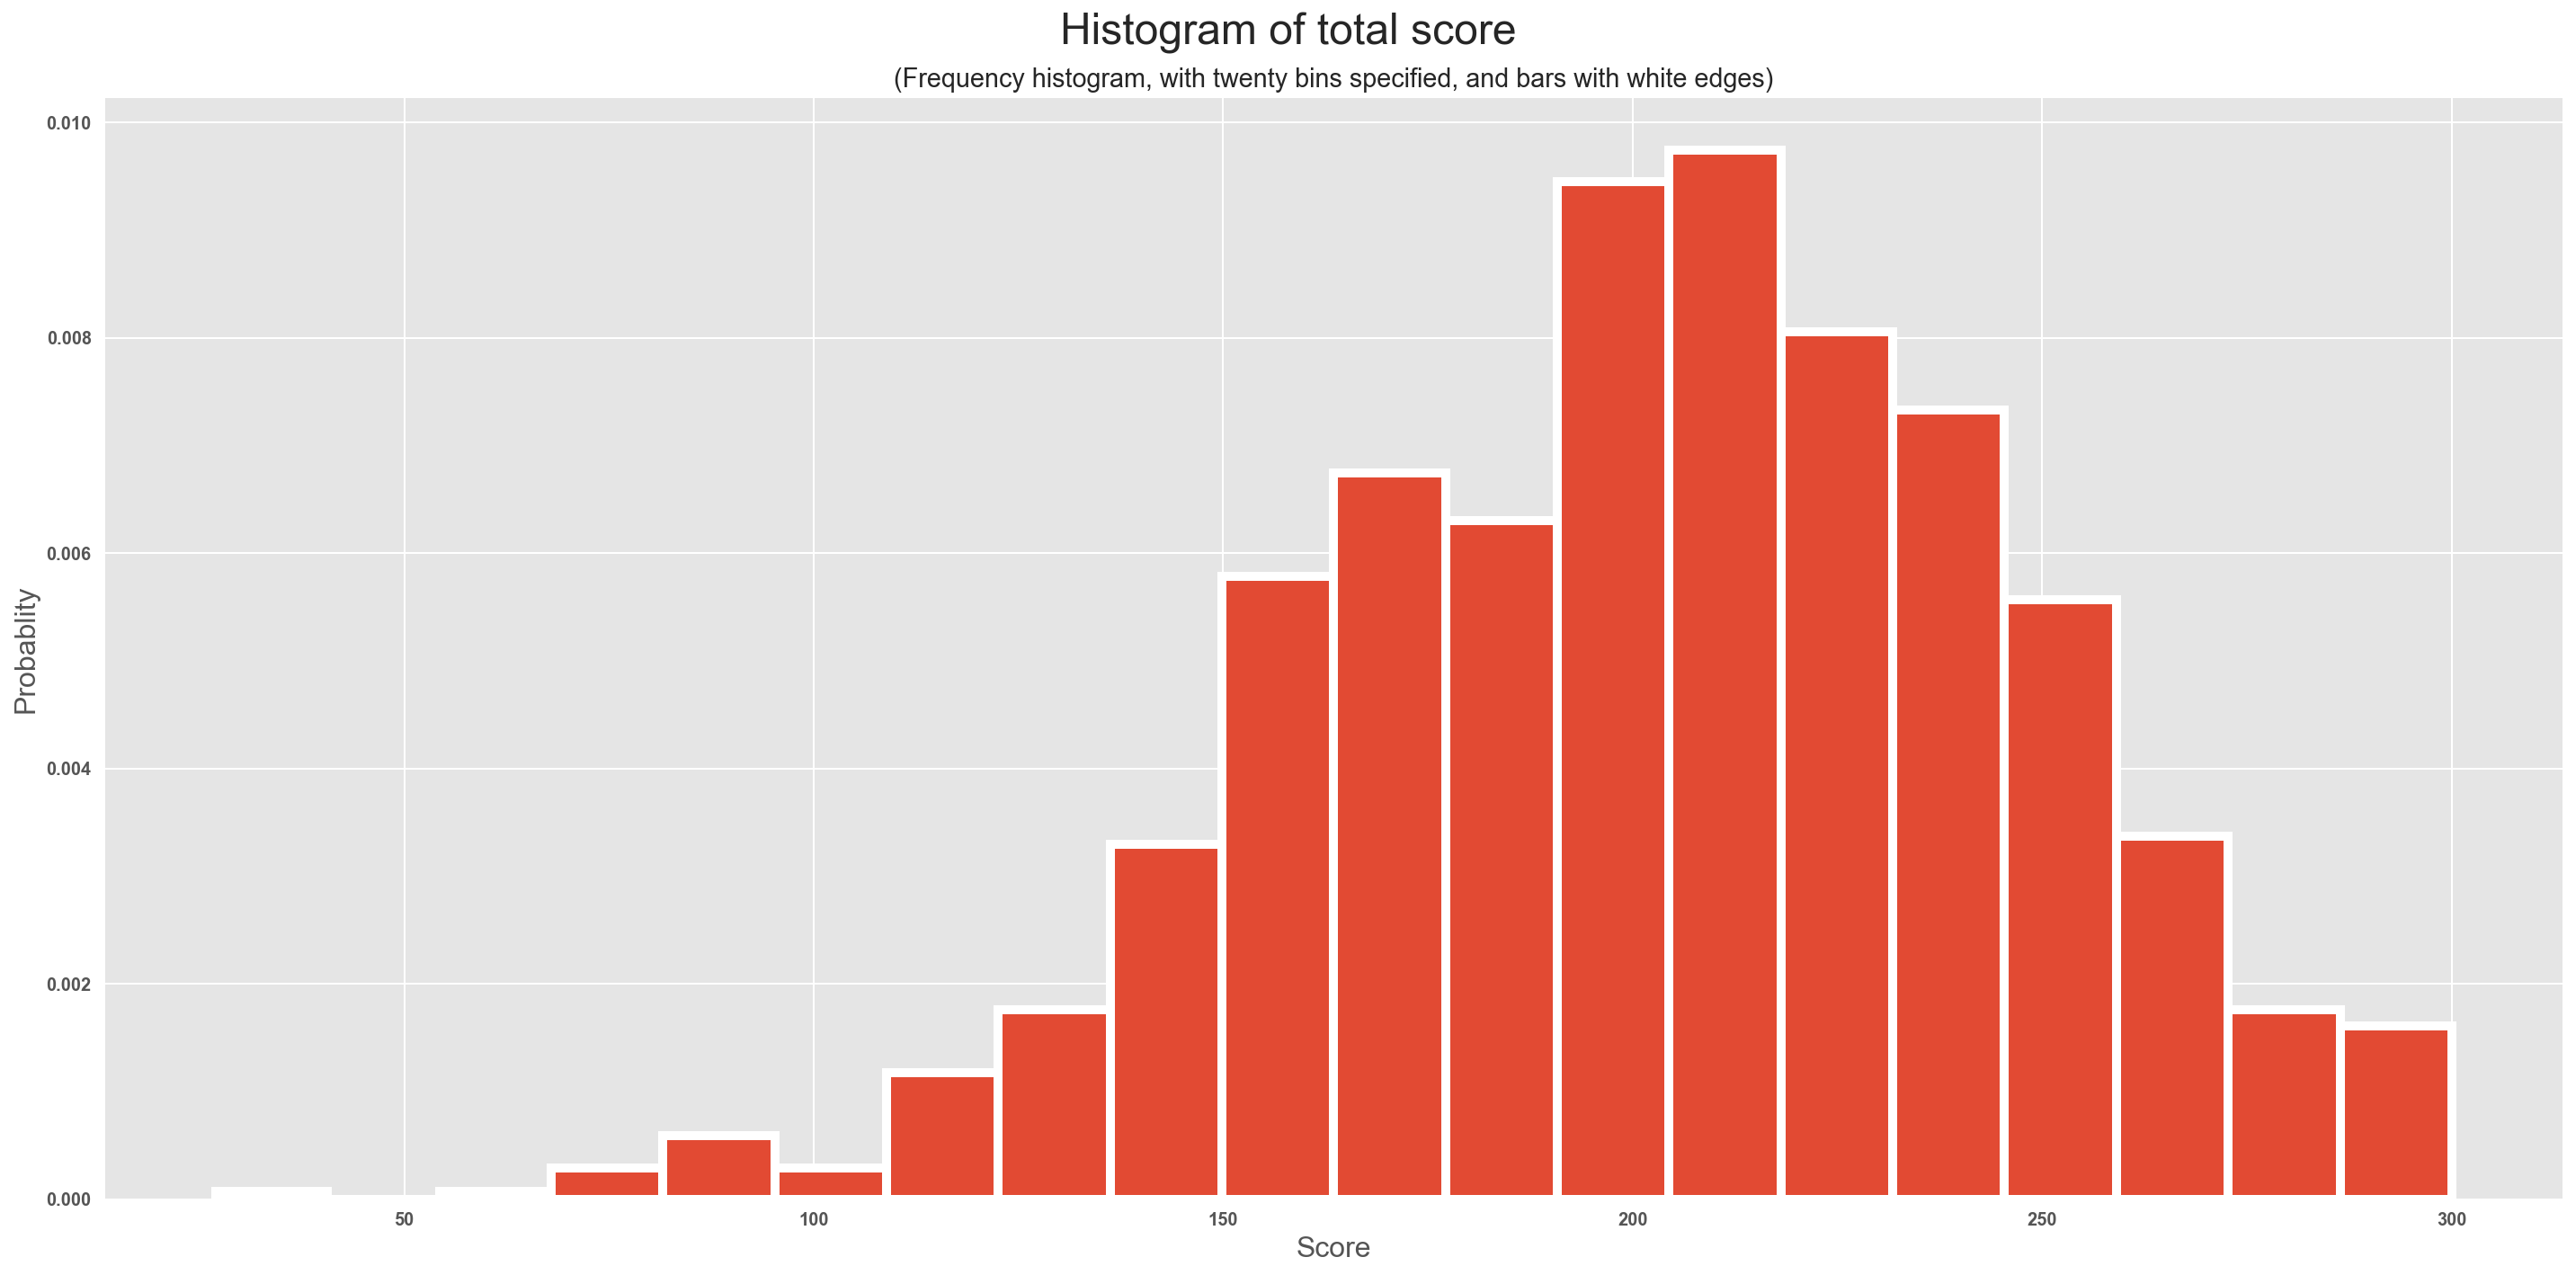

In [6]:
# Density histogram
plt.suptitle ('Histogram of total score' ,fontsize =24)
plt.title('(Frequency histogram, with twenty bins specified, and bars with white edges)')
plt.xlabel('Score', fontsize =16)
plt.ylabel('Probablity', fontsize =16)
plt.hist(data['total score'], bins=20, density = True, edgecolor ='white', lw=5) # histogram with 20 bins specified
plt.tight_layout()

### Juxtraposition of histograms

Let us juxtrapose the histograms of scores for the male and female genders in the dataset.

This is our first introduction to sub-plots. We are going to make two subplots, one on the left, and the other on the right. The left will be populated with the histogram for the female gender, and the right for the male gender. They will share a common $y$-axis, as the `total score`. 

Note how we are laterally flipping the $x$-axis for the left plot. In both the subplots, the $x$-axis stands for the frequency.

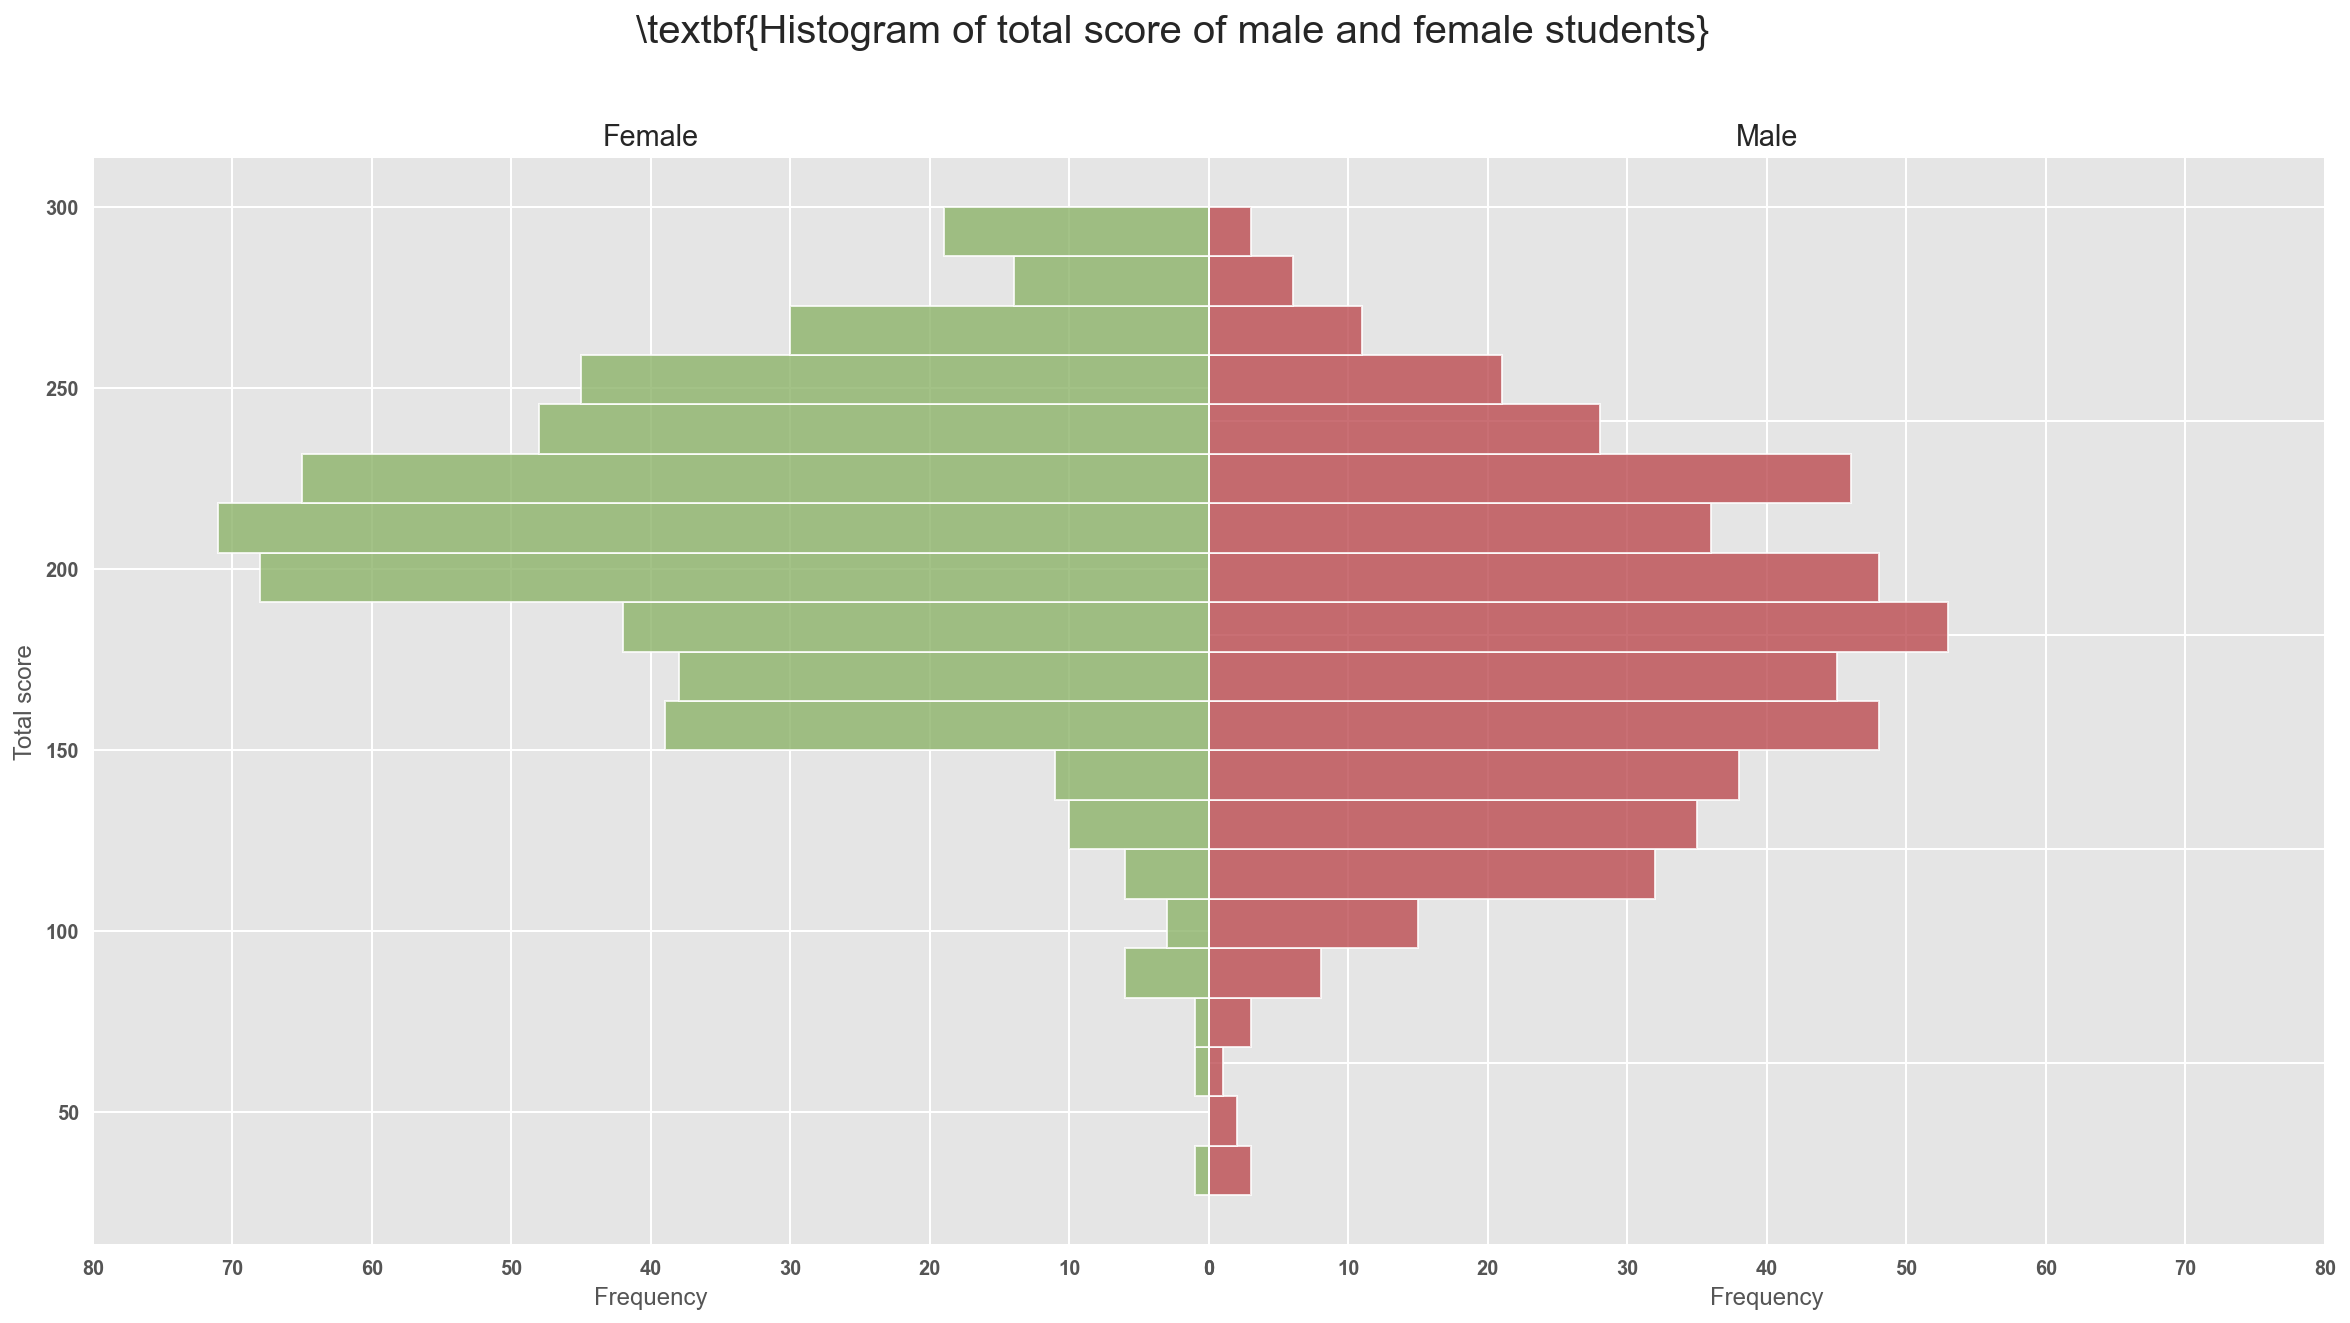

In [7]:
plt.suptitle(r"\textbf{Histogram of total score of male and female students}", fontsize=20)

# Create the first plot, on the left
ax = plt.subplot(121)    # this says, for one-row, two columns, this subplot belongs to the first column (left)
ax.hist(data[data['gender']=='female']['total score'], bins=20,
         orientation='horizontal',
        edgecolor='white', lw=1, zorder=1, color='#8CB369', label='female', alpha=0.8)

ax.set_title('Female')
ax.set_xlabel('Frequency')
ax.set_ylabel('Total score')
ax.set_xlim(0,80)
ax.invert_xaxis()

ax = plt.subplot(122)
ax.hist(data[data['gender']=='male']['total score'], bins=20,
         orientation='horizontal',
        edgecolor='white', lw=1, zorder=2, color='#BC4B51', label='male', alpha=0.8)

ax.set_yticklabels([]);
ax.set_xlabel("Frequency")
ax.set_xlim(0,80)
ax.set_title('Male')


plt.subplots_adjust(wspace=0)

### Kernel density estimators

Our eyes can intuit a smooth probability density curve that we imagine would arise if we let the dataset size be huge, and allow for a large number of bins. This is, roughly or in a hand-waiving manner, the similar to the idea of the **kernel density estimator**.

The **kde** (as the kernel density estimators are often abbreviated), for our visualization purposes, look like the asymtotic limit of histogram density histograms. **This is not strictly true** -- the kde represent an entirely different approach than the histogram density estimators, and remove some of the bias problems of the latter. But we will, for now, be deliberately sloppy, and consider them close cousins.

There is a bit more mathematical theory behind the kernel density estimators, and we will study it with more rigor in one of the later courses.

To plot the kernel density estimator for this dataset, let's use the `seaborn` library, which gives native support for it.

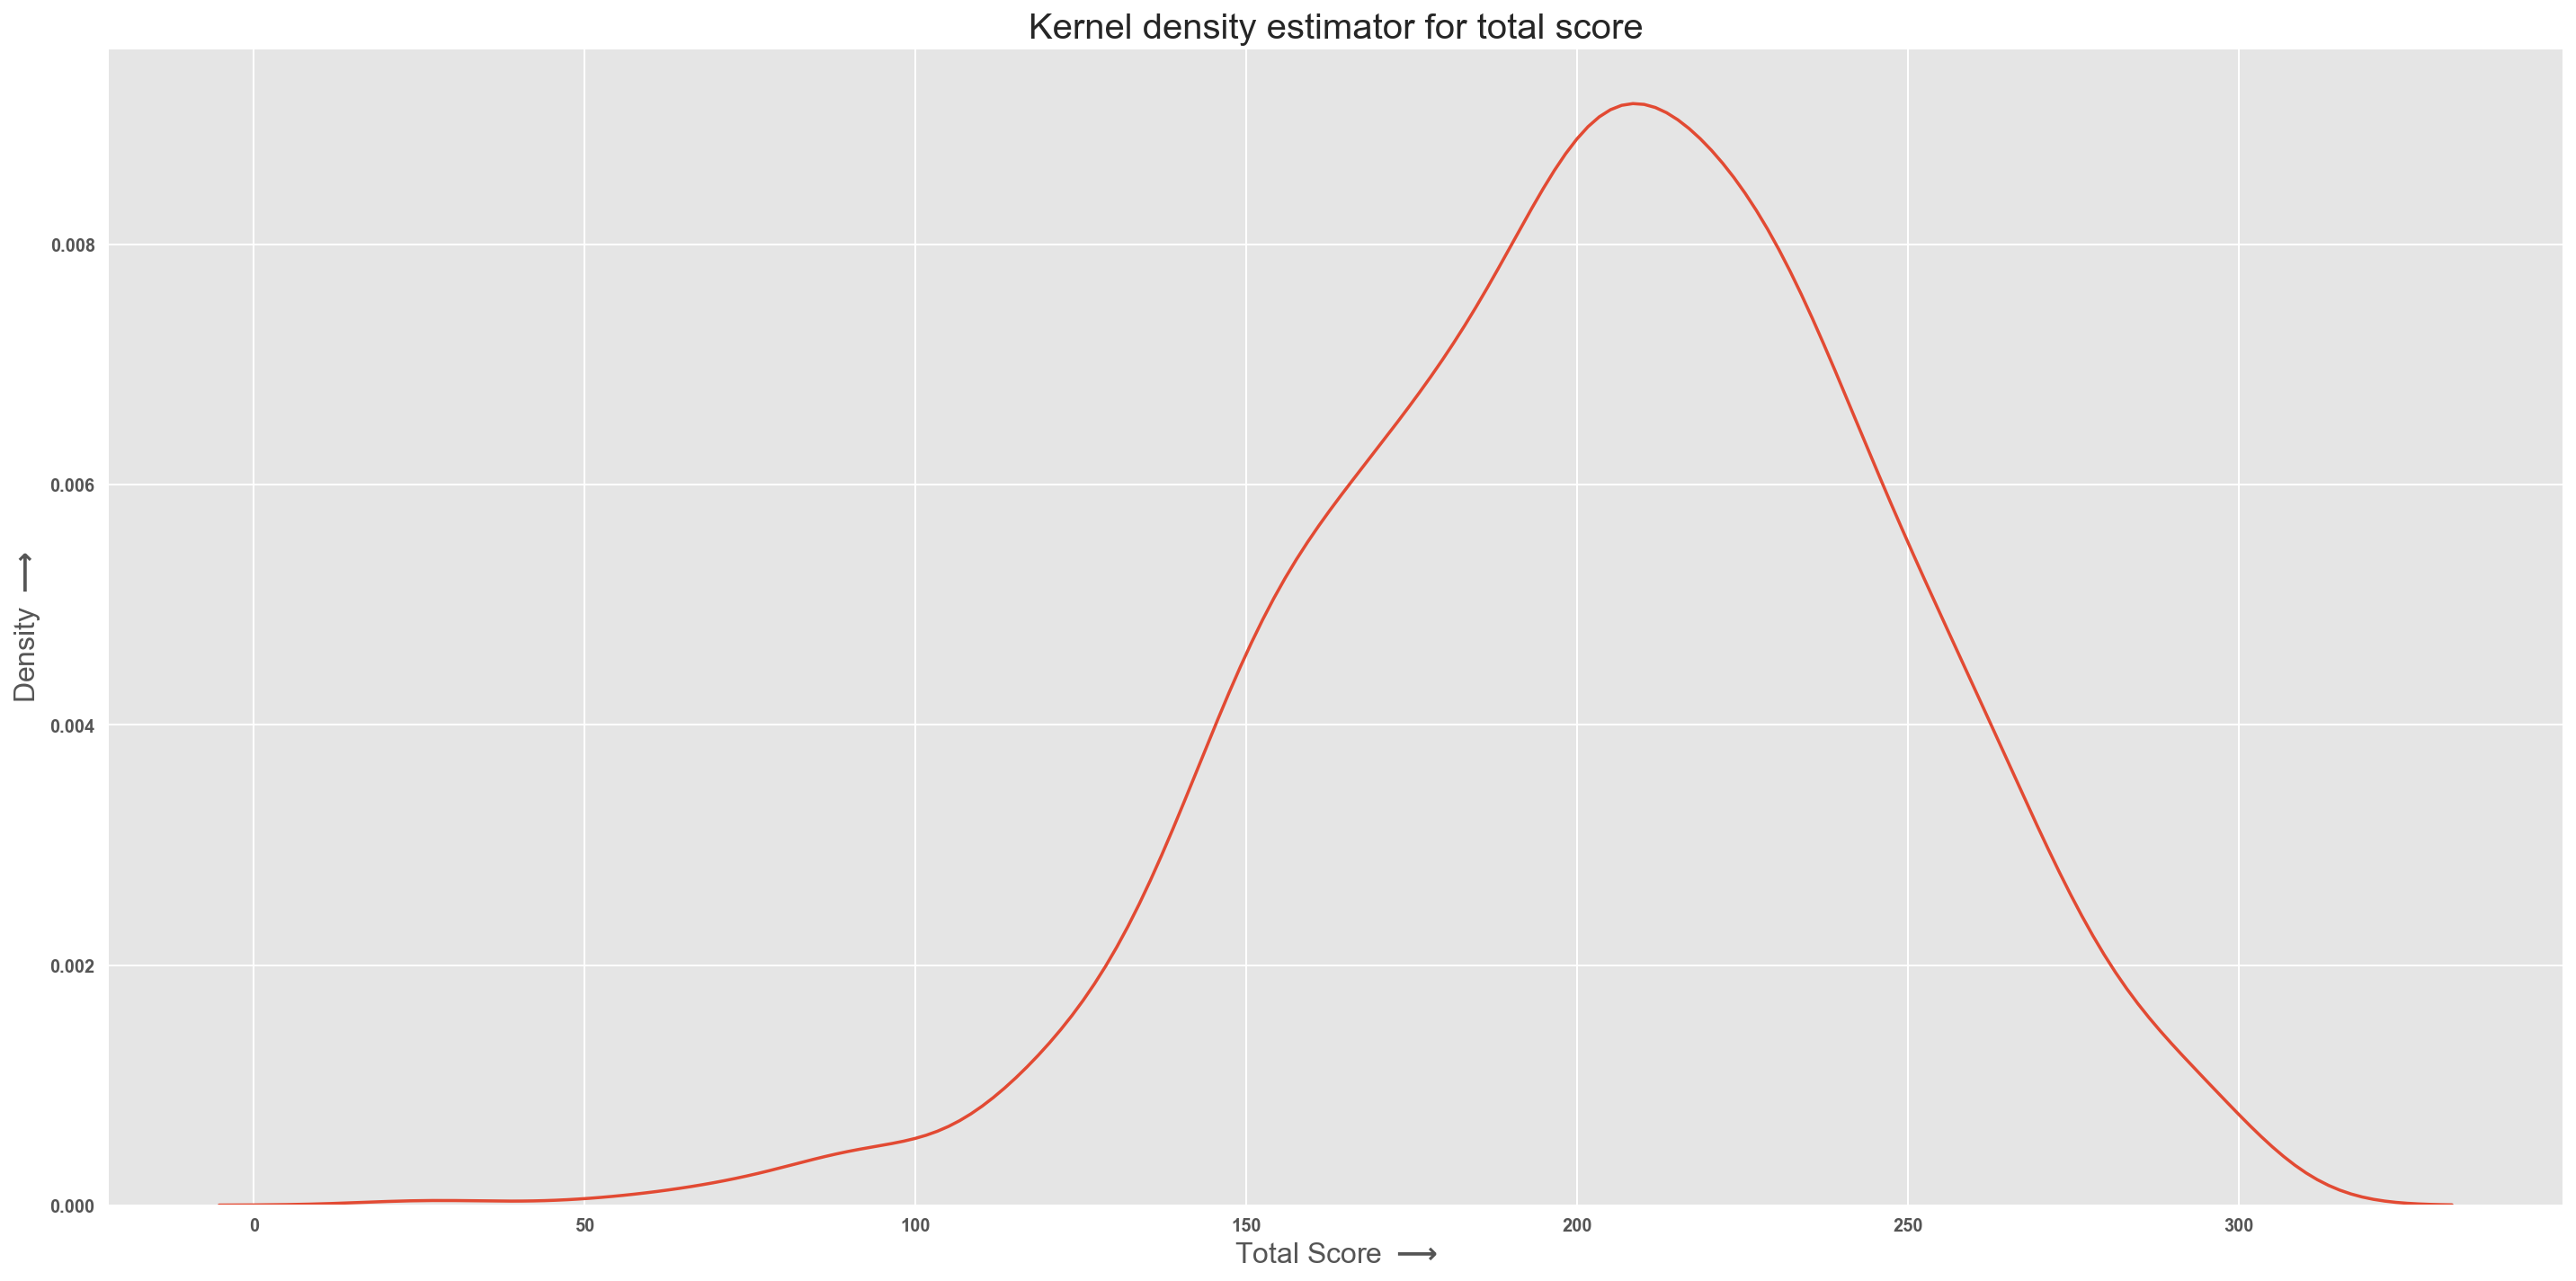

In [8]:
sns.kdeplot(data = data, x ='total score')
plt.title('Kernel density estimator for total score', fontsize = 20)
plt.xlabel(f'Total Score $\longrightarrow$', fontsize = 16)
plt.ylabel(f'Density $\longrightarrow$', fontsize = 16)
plt.tight_layout()

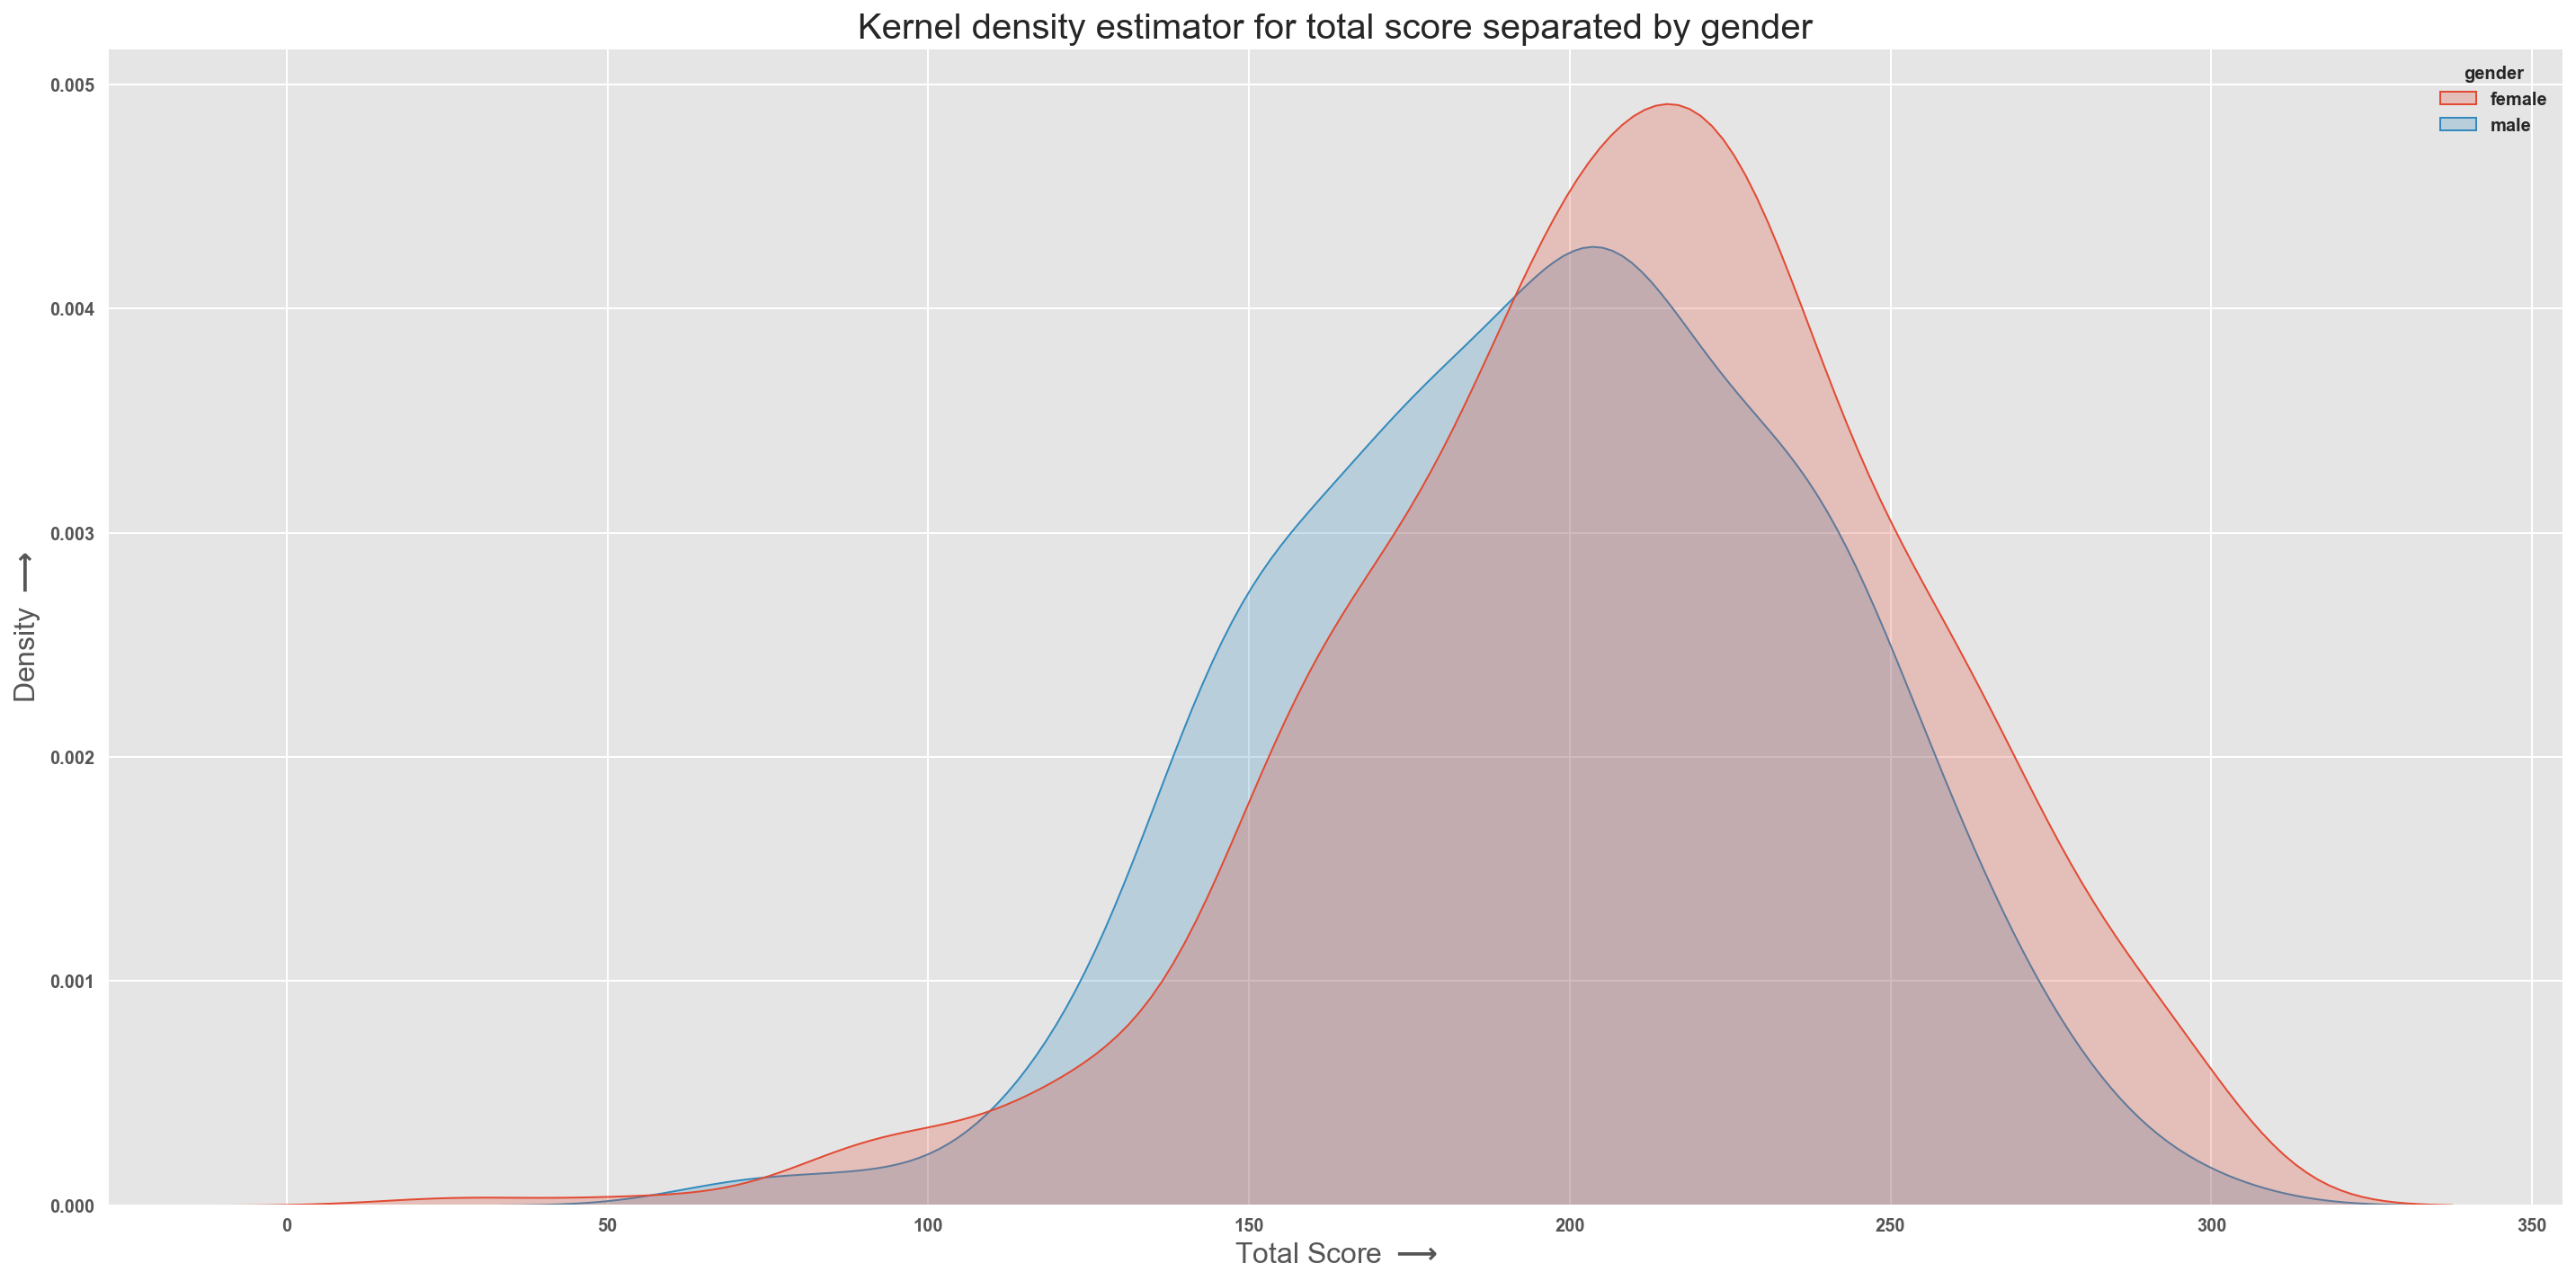

In [9]:
sns.kdeplot(data=data, x = 'total score', hue = 'gender', fill=True, linewidth=1)
plt.title('Kernel density estimator for total score separated by gender', fontsize = 20)
plt.xlabel(f'Total Score $\longrightarrow$', fontsize = 16)
plt.ylabel(f'Density $\longrightarrow$', fontsize = 16)
plt.tight_layout()

#### Separating out when there are many classes

It was visually easy to overlap the kde-plots for the two genders. But what if we have to juxtrapose the kde-plots for the different classes (values) of another categorical variable, `group`, which takes on five values `A, B, C, D, E`?

This gets more interesting -- we can separate them along a new axis, as we do below. This is a slightly complicated  -- and perhaps intimidating -- code at first glance, and we should pore over this slowly. Note the use of `grid_spec.GridSpec`. It allows for the creation of visually complex but informative plots.

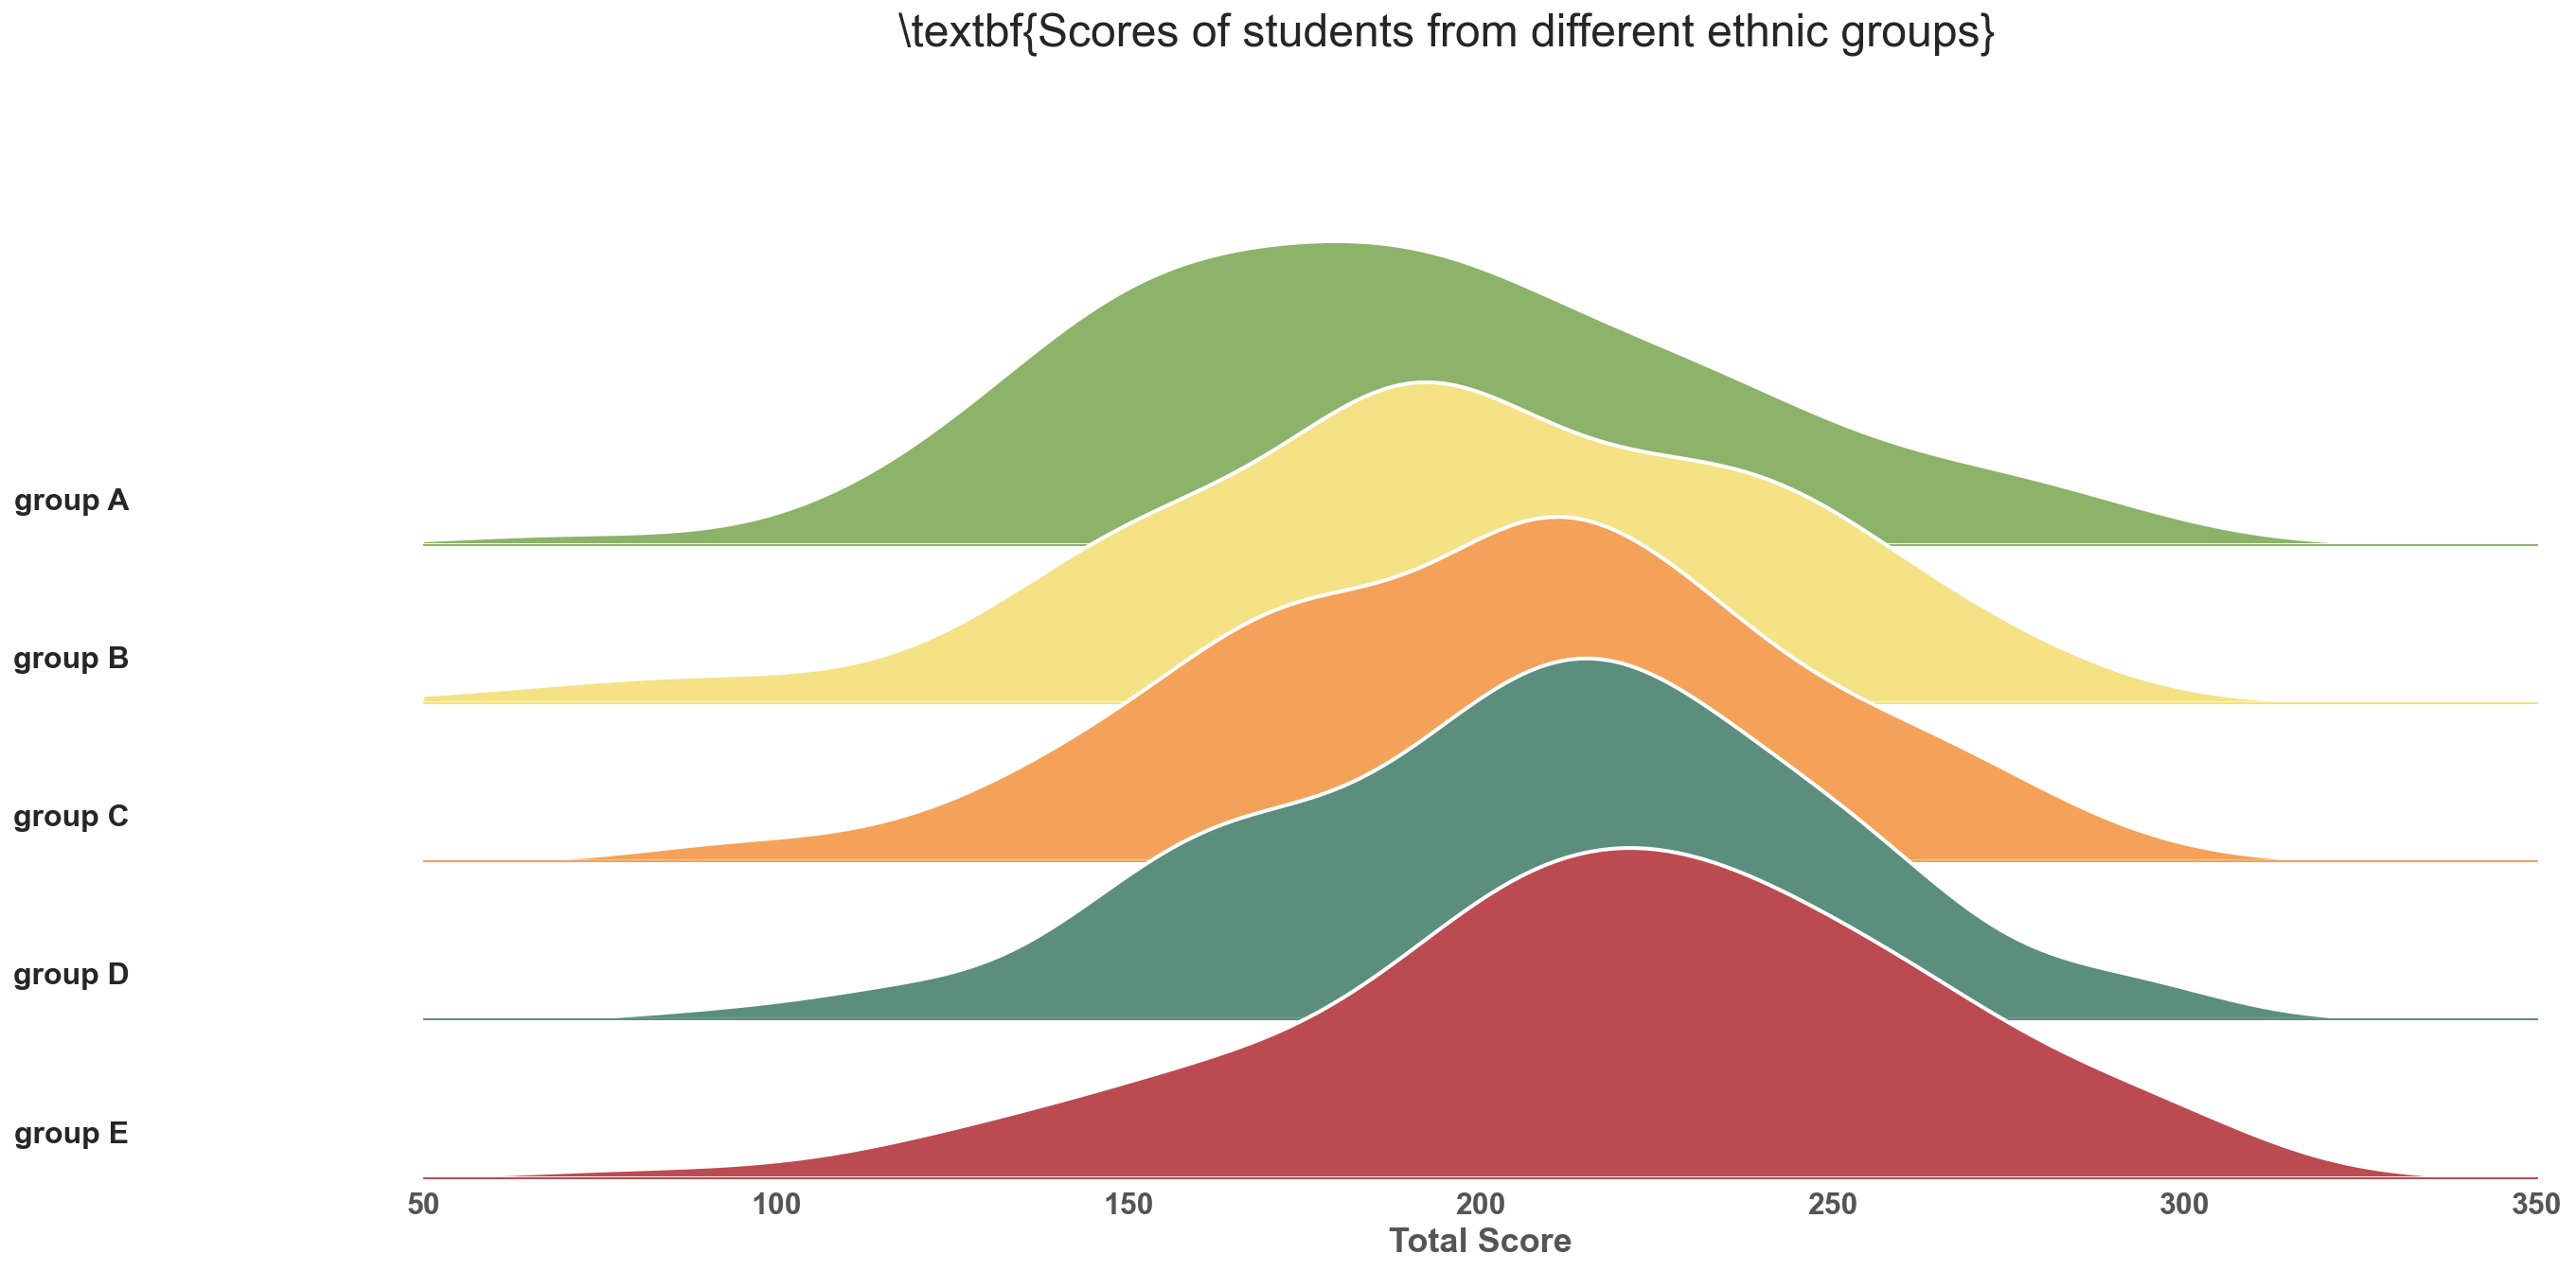

In [10]:
import matplotlib.gridspec as grid_spec

fig = plt.figure(figsize=(20,10))
plt.suptitle(r"\textbf{Scores of students from different ethnic groups}", size=24)
ethnicities = data['race/ethnicity'].unique()
ethnicities = np.sort(ethnicities)                                # put it in alphabetical order
axs = []                                                          # list of axes
gs = (grid_spec.GridSpec(len(ethnicities),1))

colors=['#8CB369','#F4E285', '#F4A259', '#5B8E7D', '#BC4B51']     # colors for each density plot 

for index,ethnicity in enumerate(ethnicities):
    axs.append(fig.add_subplot(gs[index]))
    ax = axs[index]
    sns.kdeplot(data=data[data['race/ethnicity'] == ethnicity], 
                x='total score', 
                fill=True, ax=ax, 
                color=colors[index], 
                alpha=1, 
                edgecolor='white',
                lw=2,                                             # line weight
               )
    ax.set_xlim(50, 350)
    ax.set_ylim(0,0.011)
    if index == len(ethnicities)-1:
        ax.set_xlabel("Total Score", fontsize=18, fontweight='bold')# visible x-label for the bottom plot
    else:
        ax.set_xticklabels([])                                     # remove x-axis tick labels
    ax.set_yticks([])                                              # remove y-axis ticks
    ax.set_ylabel("")
    ax.tick_params(grid_alpha=0, labelsize=16)                     # hide grid lines
    ax.patch.set_alpha(0)                                          # hide background 
    ax.spines[["top","right","left"]].set_visible(False)
    ax.spines['bottom'].set(color=colors[index])# hide borders
    ax.text(-0.02,0.001,ethnicity,fontweight="bold",fontsize=16,ha="center")
    
gs.update(hspace= -0.6)                                 #overlap subplots

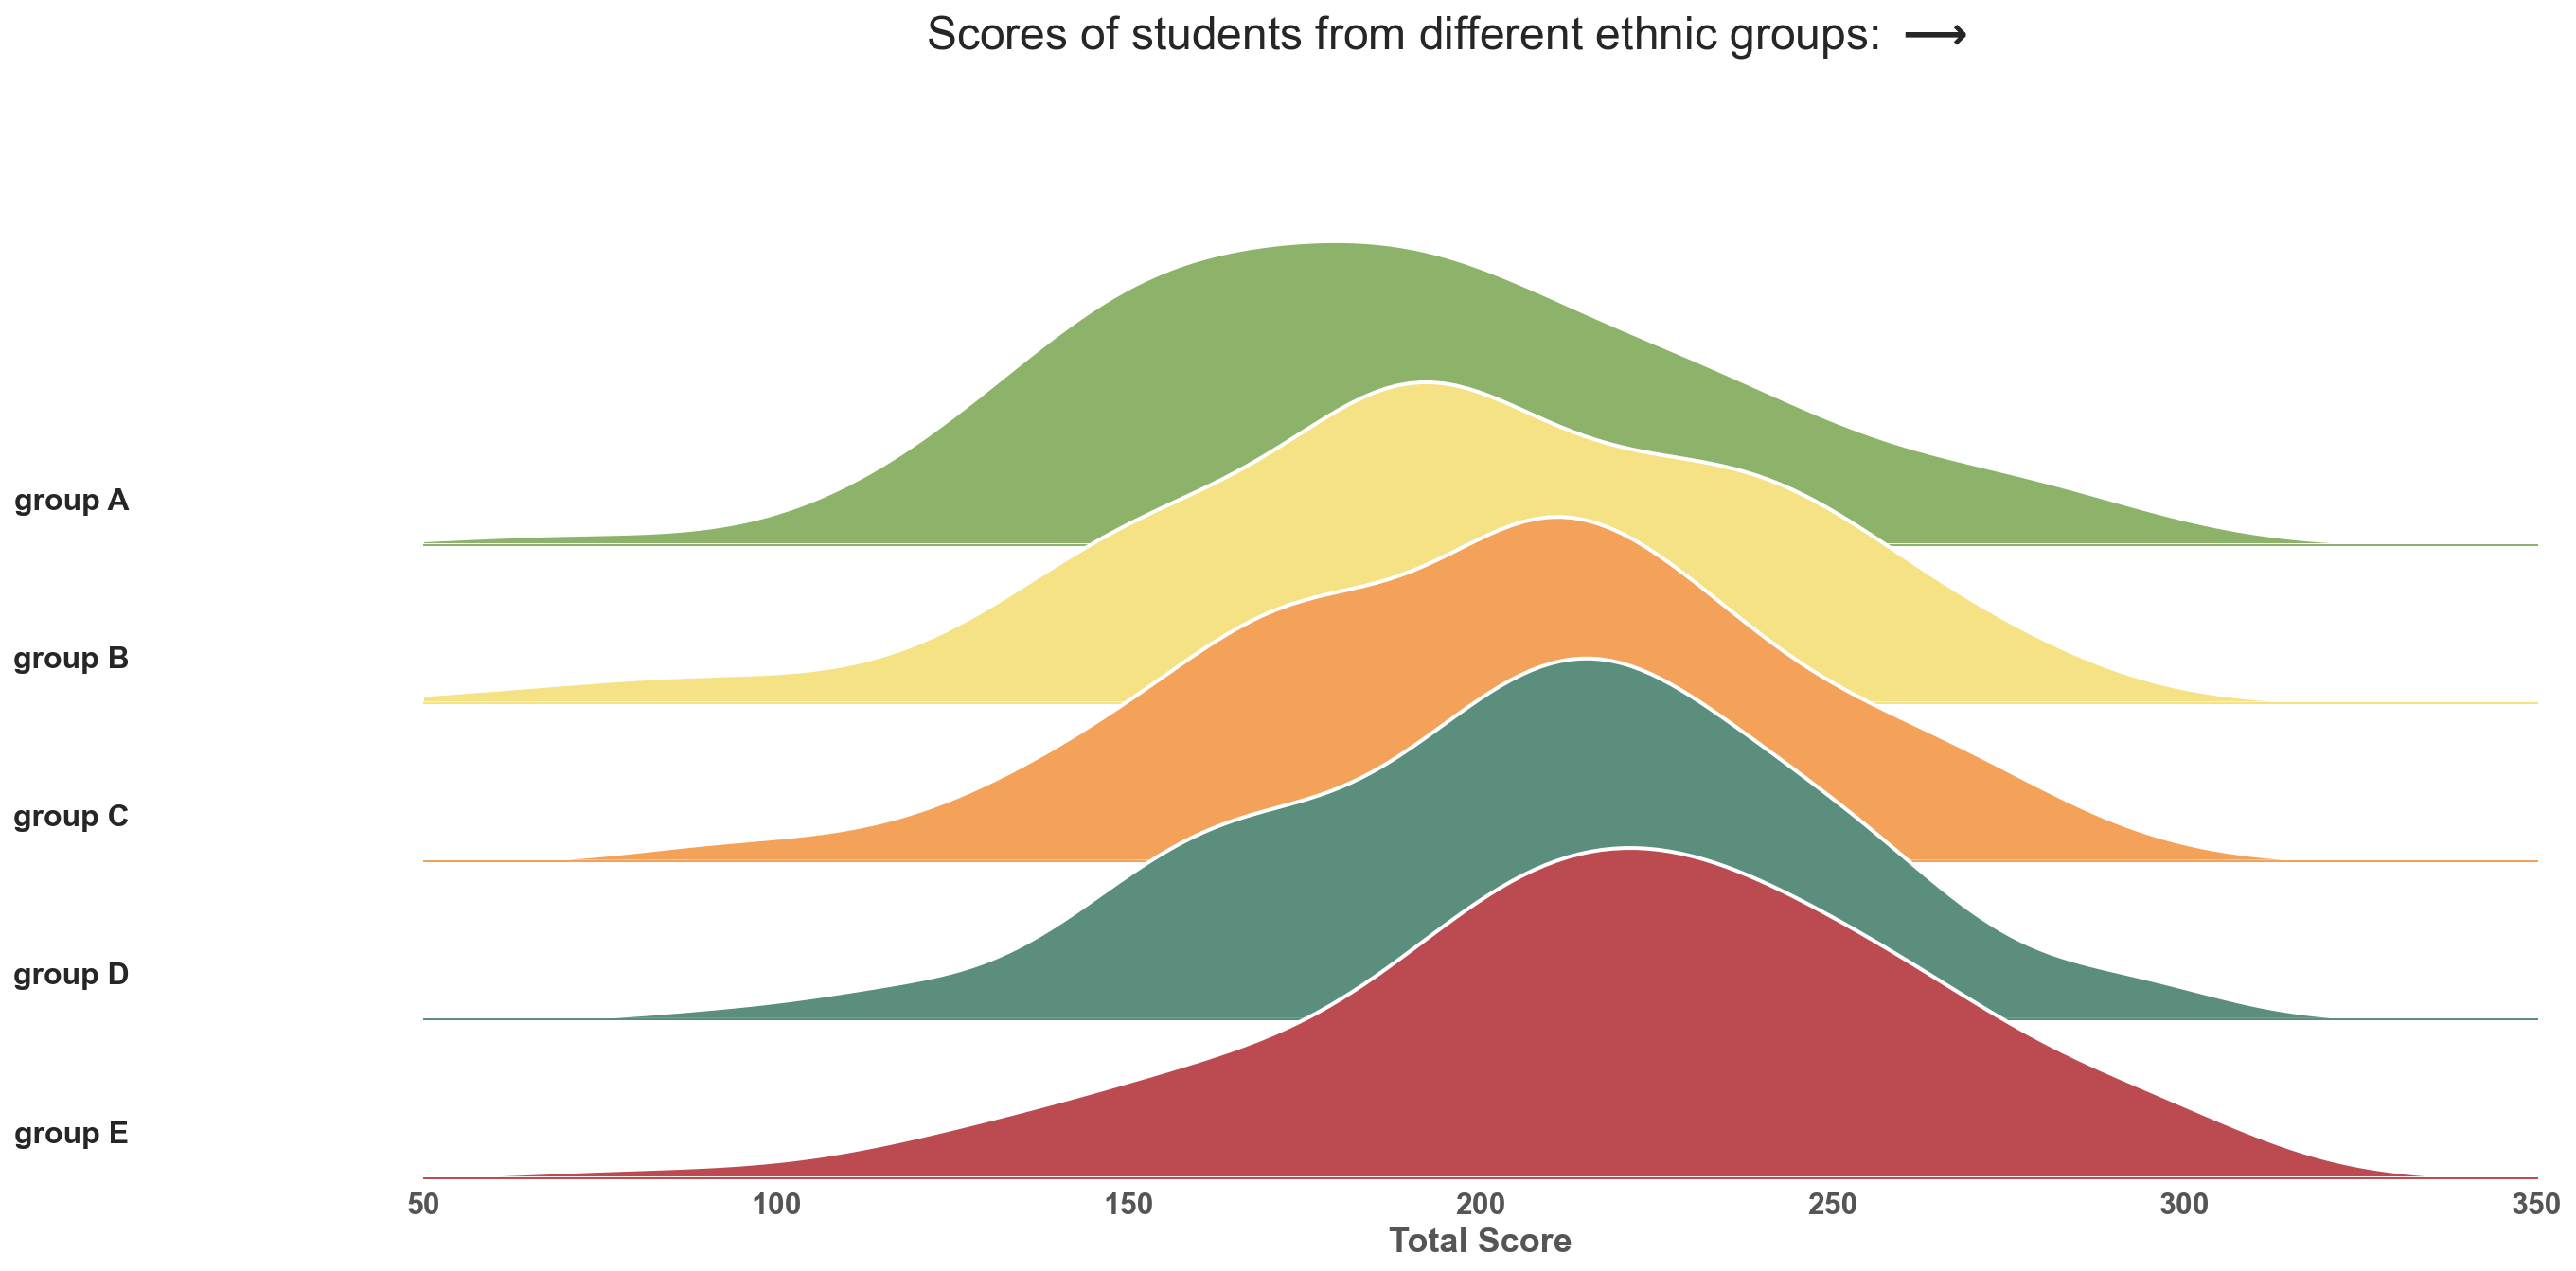

In [11]:
import matplotlib.gridspec as grid_spec

fig = plt.figure(figsize=(20,10))
plt.suptitle(f'Scores of students from different ethnic groups: $\longrightarrow$', size=24)
ethnicities = data['race/ethnicity'].unique()
ethnicities = np.sort(ethnicities)                                # put it in alphabetical order
axs = []                                                          # list of axes
gs = (grid_spec.GridSpec(len(ethnicities),1))
colors=['#8CB369','#F4E285', '#F4A259', '#5B8E7D', '#BC4B51']     # colors for each density plot 

for index, ethnicity in enumerate(ethnicities):
    axs.append(fig.add_subplot(gs[index]))
    ax =axs[index]
    sns.kdeplot(data = data[data['race/ethnicity'] == ethnicity],
                x='total score', 
                fill=True, ax=ax, 
                color=colors[index], 
                alpha=1, 
                edgecolor='white',
                lw=2,
               )
    ax.set_xlim(50, 350)
    ax.set_ylim(0,0.011)
    if index == len(ethnicities)-1:
        ax.set_xlabel("Total Score", fontsize=18, fontweight='bold')# visible x-label for the bottom plot
    else:
        ax.set_xticklabels([])                                     # remove x-axis tick labels
    ax.set_yticks([])
    ax.set_ylabel("")
    ax.tick_params(grid_alpha=0, labelsize=16)                     # hide grid lines
    ax.patch.set_alpha(0)
    ax.spines[["top","right","left"]].set_visible(False)
    ax.spines['bottom'].set(color=colors[index])# hide borders
    ax.text(-0.02,0.001,ethnicity,fontweight="bold",fontsize=16,ha="center")
gs.update(hspace = -0.6) 

    

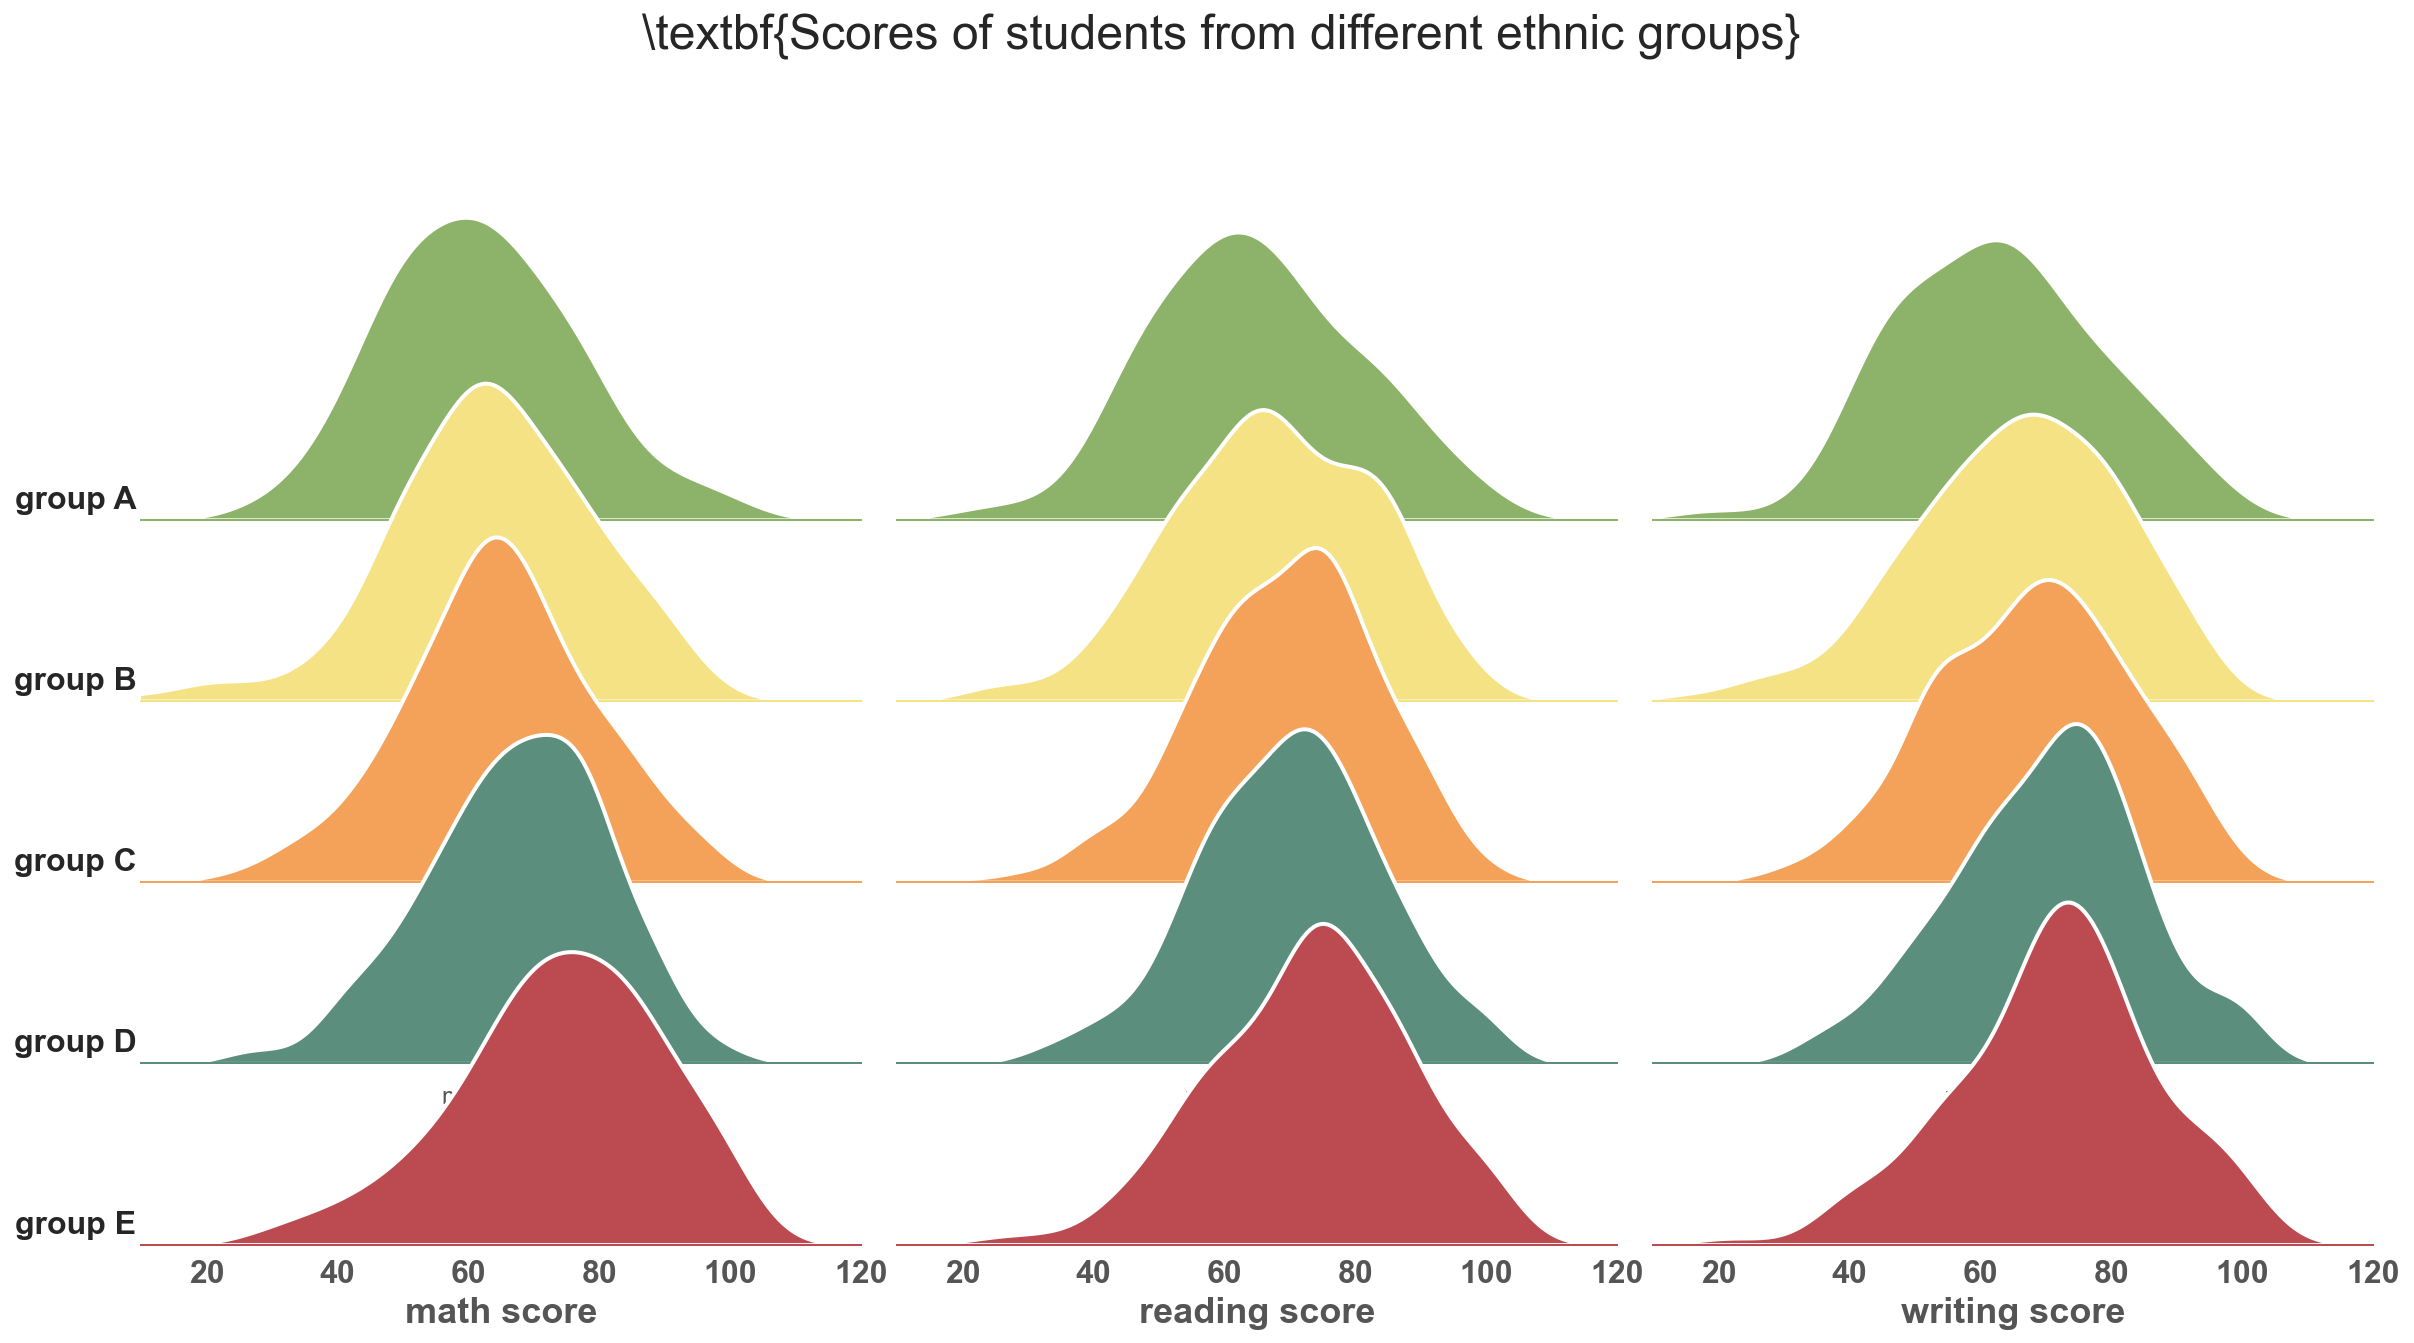

In [12]:
import matplotlib.gridspec as grid_spec

fig = plt.figure(figsize=(20,10))
plt.suptitle(r"\textbf{Scores of students from different ethnic groups}", size=24)
ethnicities = data['race/ethnicity'].unique()
ethnicities = np.sort(ethnicities)                                # put it in alphabetical order

axs = []                                                              # list of axes
gs = (grid_spec.GridSpec(len(ethnicities),3))

colors=['#8CB369','#F4E285', '#F4A259', '#5B8E7D', '#BC4B51']         # colors for each ethnic group 

for col, score in enumerate(['math score', 'reading score', 'writing score']):
    for row, ethnicity in enumerate(ethnicities):
        ax = fig.add_subplot(gs[row, col])
        axs.append(ax)
        sns.kdeplot(data=data[data['race/ethnicity'] == ethnicity], 
                    x=score, 
                    fill=True, ax=ax, 
                    color=colors[row], 
                    alpha=1, 
                    edgecolor='white',
                    lw=2,                                              # line weight
                   )
        ax.set_xlim(10, 120)
        ax.set_ylim(0,0.03)
        
        # set labels and texts
        if row == len(ethnicities)-1:
            ax.set_xlabel(score, fontsize=18, fontweight='bold')       # visible x-label for the bottom plot
        else:
            ax.set_xticklabels([])                                     # remove x-axis tick labels
        if col == 0:
            ax.text(-0.02,0.001,ethnicity,fontweight="bold",fontsize=16,ha="center")
        
        #clean up the plot
        ax.set_yticks([])                                              # remove y-axis ticks
        ax.set_ylabel("")                                              # remove y-axis label
        ax.tick_params(grid_alpha=0, labelsize=16)                     # hide grid lines
        ax.patch.set_alpha(0)                                          # hide background color 
        ax.spines[["top","right","left"]].set_visible(False)           # hide boundaries
        ax.spines['bottom'].set(color=colors[row])                     # set the color of the bottom boundary
              
    
gs.update(hspace= -0.5)                                                # overlap each row to create a stacked effect
gs.update(wspace= 0.05)   

### Box and whiskers plot

Box and whikers plot, often referred to simply as the box-plot, is another way to show the distribution of the data.

The box extends over the interquantile range $IQR = Q1 \text{ to } Q3$ (from the first quantile to the third quantile, i.e. 25th percentile to the 75th percentile).

The whiskers span to 1.5 time the IQR (interquantile range) in each direction. The points beyond them are considered outliers, and these are marked appropriately as the flyer points.

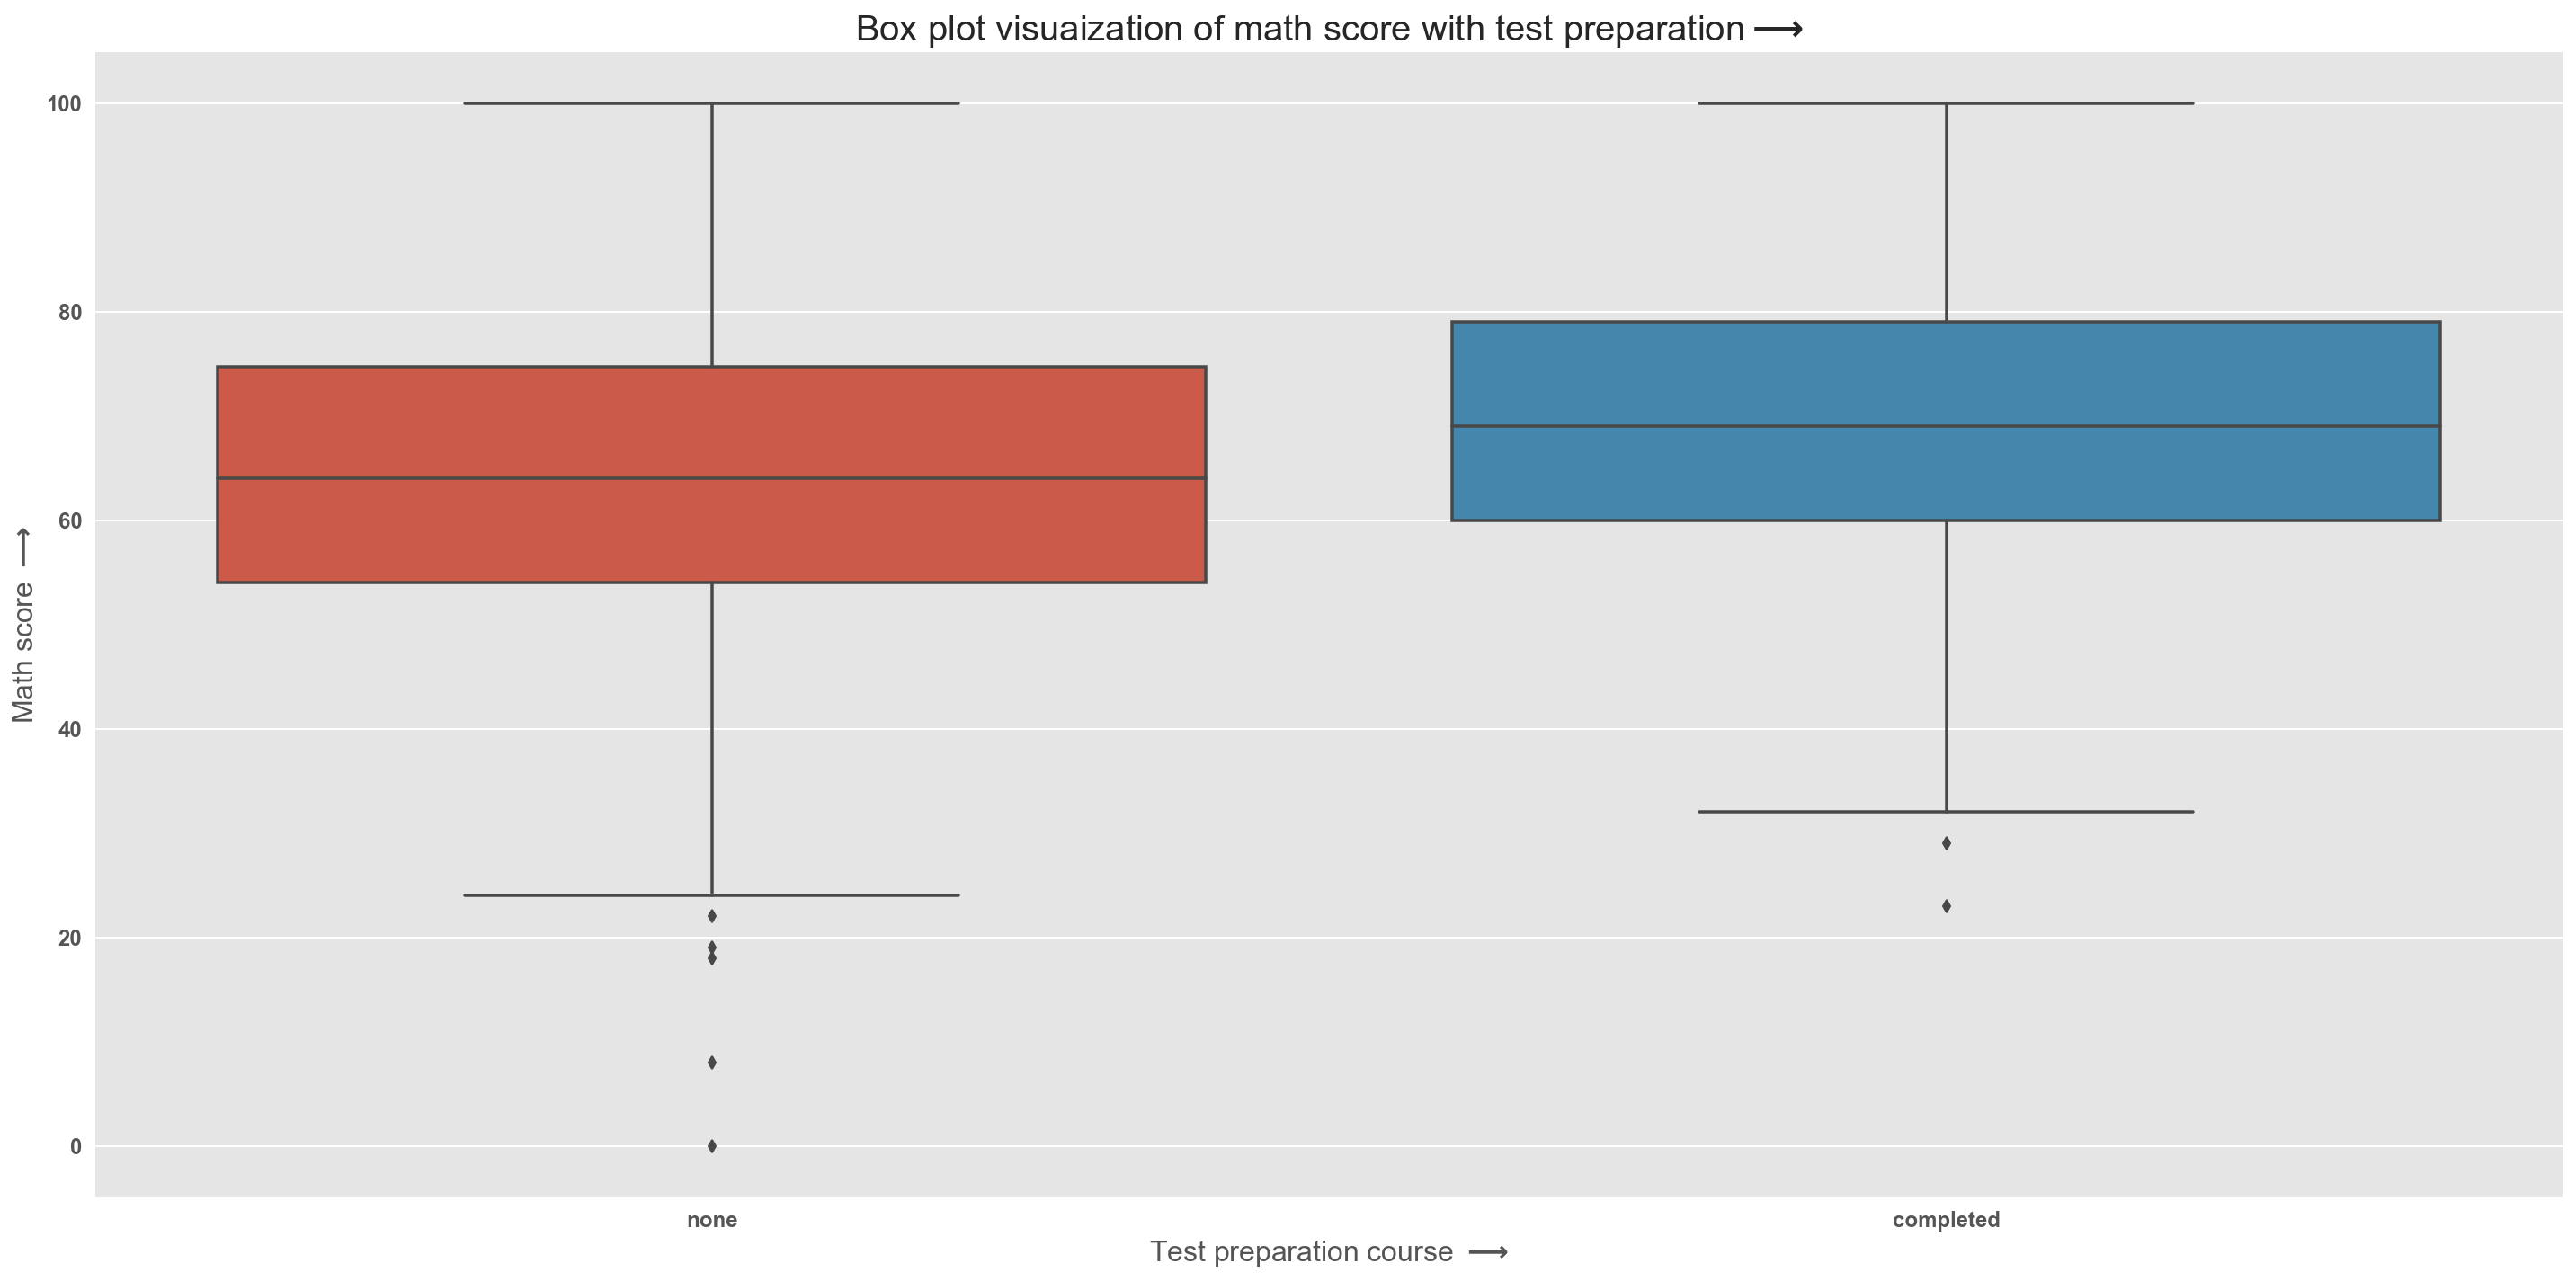

In [13]:
fig = plt.figure(figsize = (20, 10)) # Create a figure with 20 inches by 10 inches
ax= sns.boxplot(data = data, x ='test preparation course', y = 'math score')
ax.set_title (f'Box plot visuaization of math score with test preparation$\longrightarrow$', fontsize =20)
ax.tick_params(labelsize=12)
ax.set_xlabel(f'Test preparation course $\longrightarrow$', fontsize =16)
ax.set_ylabel(f'Math score $\longrightarrow$', fontsize =16)
plt.tight_layout() # Reoves unwanted labeling


### Violin plots

Violin plots are aesthetically pleasing as well as informative. As such they are rather popular. They are composed by visually overlapping two elements:

* kde-plot for a feature
* box plot

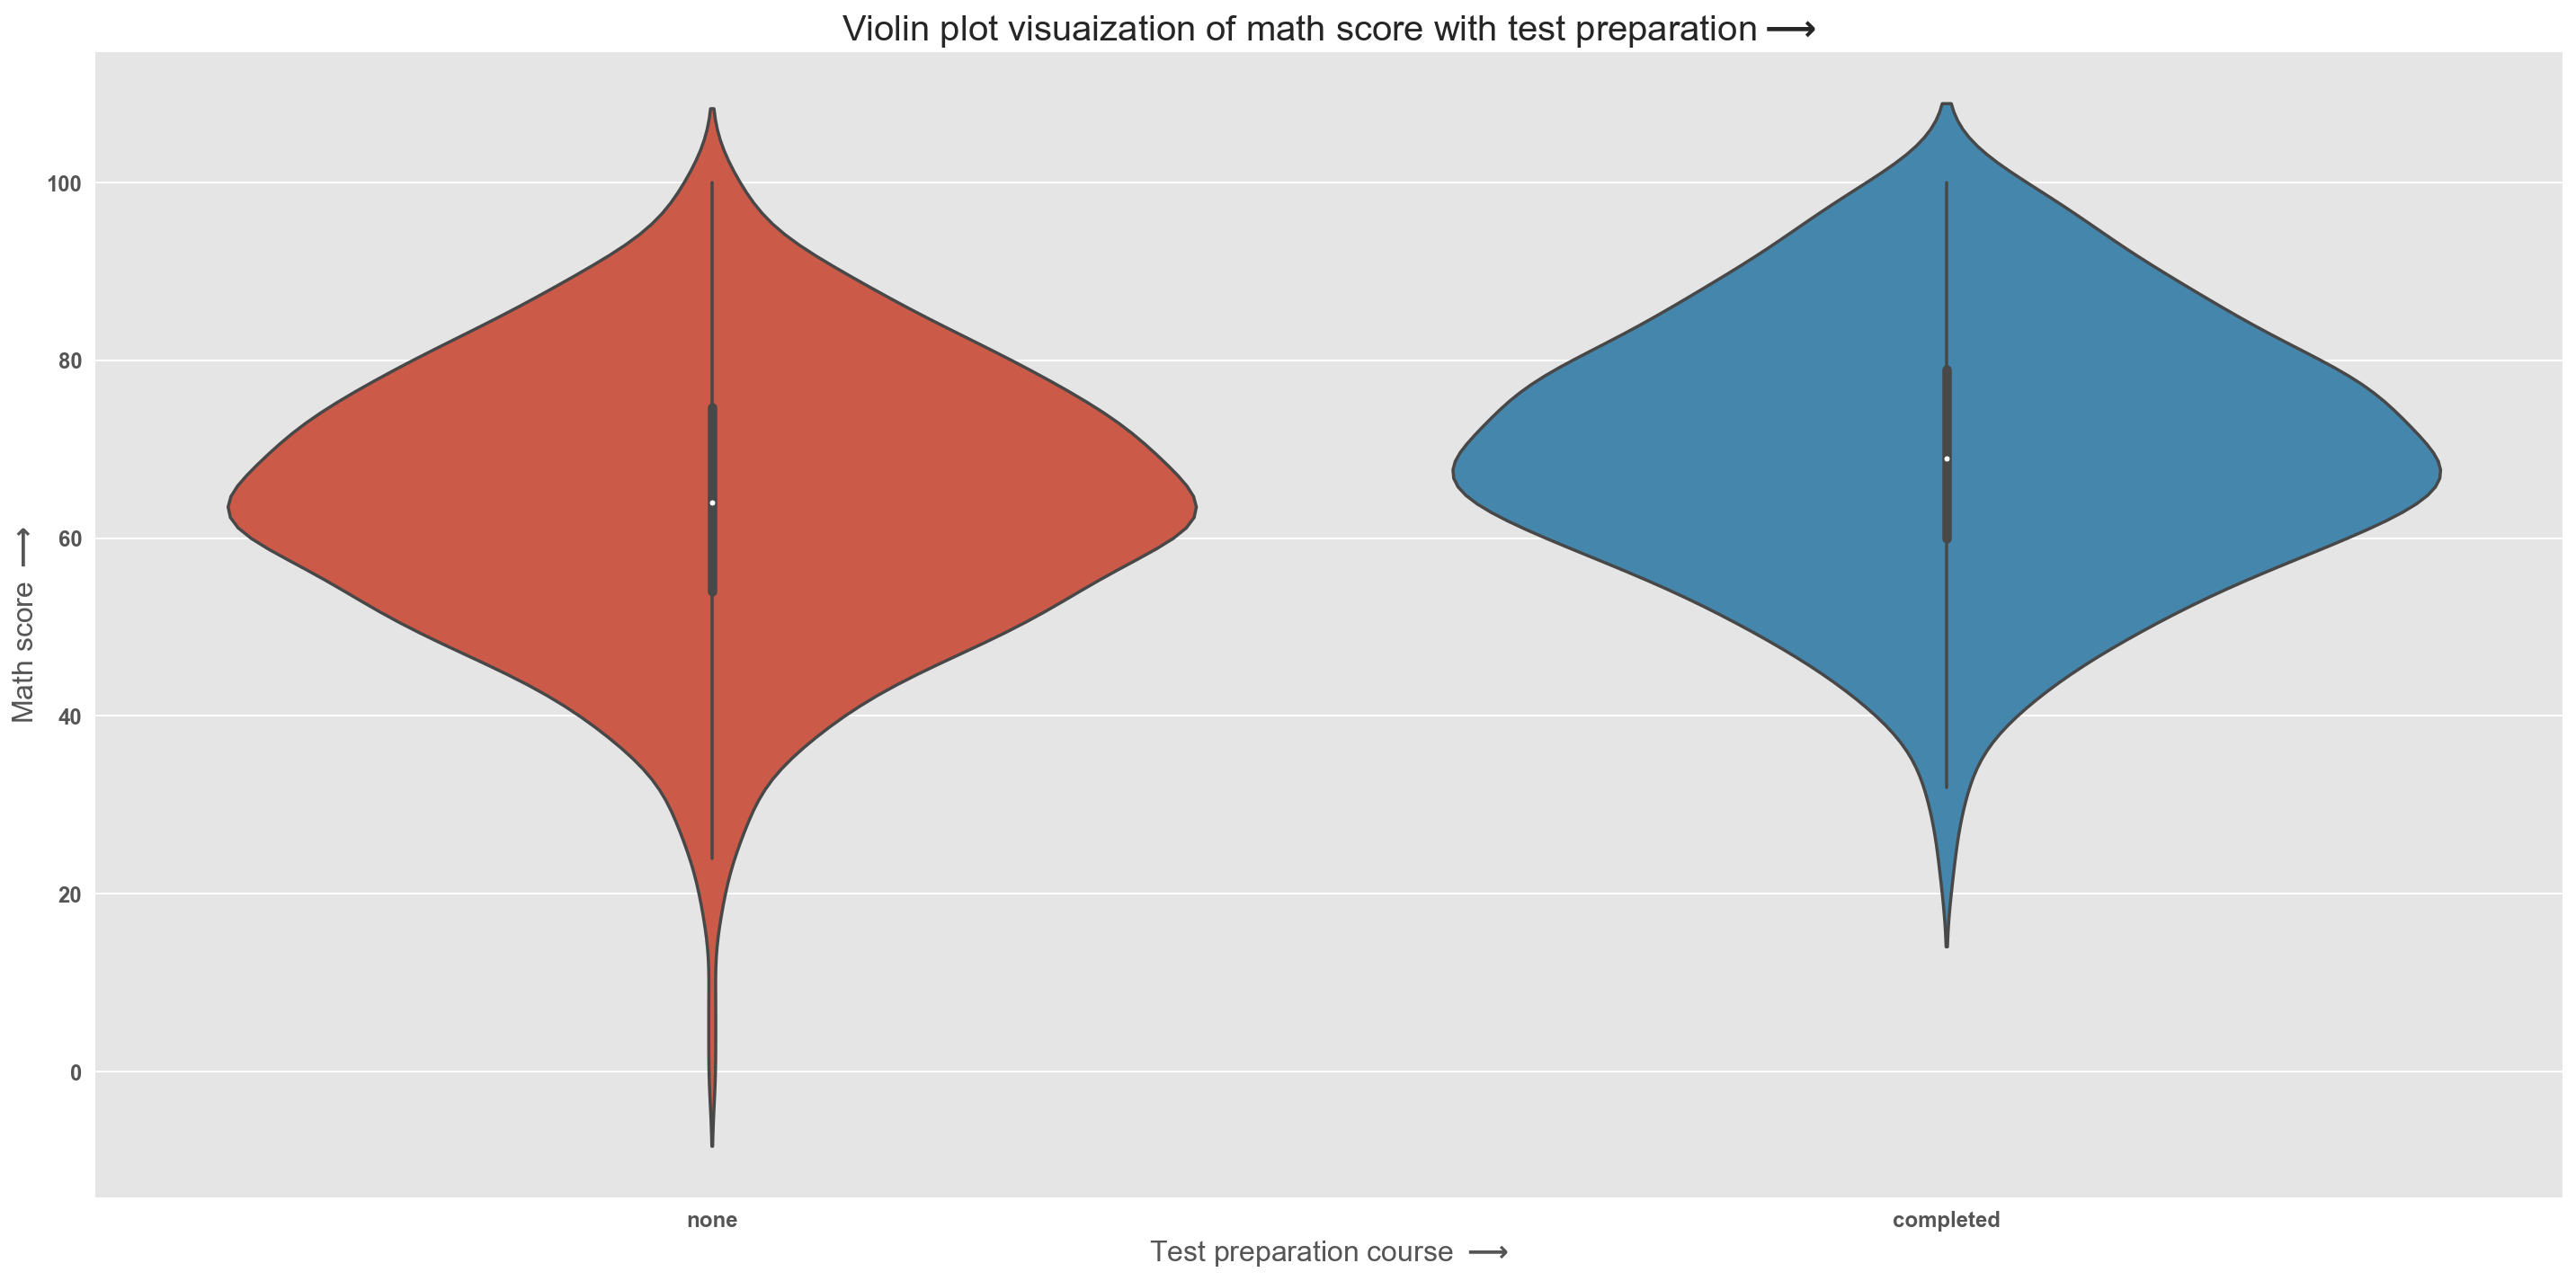

In [14]:
fig = plt.figure(figsize = (20, 10)) # Create a figure with 20 inches by 10 inches
ax= sns.violinplot(data = data, x ='test preparation course', y = 'math score')
ax.set_title (f'Violin plot visuaization of math score with test preparation$\longrightarrow$', fontsize =20)
ax.tick_params(labelsize=12)
ax.set_xlabel(f'Test preparation course $\longrightarrow$', fontsize =16)
ax.set_ylabel(f'Math score $\longrightarrow$', fontsize =16)
plt.tight_layout() # Reoves unwanted labeling

## Final thoughts

In this lesson, we learned about four kinds of plots for univariate data:

* frequency and density histograms
* kernel density estimators
* box-and-whiskers plots
* violin plots

These plot visualize, each in its own way, the distribution of data points across the range of values.

In [15]:
"vc                                                                                                                                                                                                                                                                  "

'vc                                                                                                                                                                                                                                                                  '